<a href="https://colab.research.google.com/github/MTS0222/Bike-shop-EDA/blob/main/Bike_shop_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1x-nvYl9at9rKooQf1L3SyF92dCkrddd2/view?usp=drive_link

https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis?resource=download

# 🚲 Bike shop EDA & Profitability analysis

## Introduction  
This notebook explores the sales, profit, and customer behavior patterns in a bike shop, using transaction data from Jan 2015 to July 2016.

After exploring the data, I noticed a significant drop in sales in June 2016. In this notebook, I aim to investigate the possible reasons behind this decline. I initially considered a few hypotheses, for instance, the shop may have decided to shut down, there may be incomplete data for the final month, or the data could be corrupted. However, my primary hypothesis is that bicycles served as an "anchor" product, driving sales of related accessories and apparel. A sharp decline in bicycle sales may have therefore led to a broader drop across other product categories.

> **Note on time range:**  
> The dataset covers a full year in 2015 but only six months in 2016. I believe it doesnt make much sense to compare yearly sales (2015 vs 2016), as the dataset does not include a full year of data for 2016. Additionally, it’s difficult to accurately analyze seasonality trends: 2016 is incomplete, and for 2015, any seasonal patterns are confounded by the shop’s growth and development, which are influenced by multiple factors beyond seasonality alone. Of course we can use google trends to see the seasonality trends but that’s beyond this notebook’s scope.


## Research Goals  
1. Measure bikes’ impact on sales and profit

2. See what’s bought with bikes (basket analysis)

3. Compare margins across countries and products

4. Understand customer profiles by age and region

5. Check if removing bikes caused the mid‑2016 sales crash





In [ ]:
! gdown --id 1x-nvYl9at9rKooQf1L3SyF92dCkrddd2

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1x-nvYl9at9rKooQf1L3SyF92dCkrddd2
To: /content/salesforcourse-4fe2kehu.csv
100% 3.51M/3.51M [00:00<00:00, 27.1MB/s]


In [ ]:
! unzip /content/drive/MyDrive/collab.new/salesforcourse-4fe2kehu.csv.zip -y

Archive:  /content/drive/MyDrive/collab.new/salesforcourse-4fe2kehu.csv.zip
caution: filename not matched:  -y


In [ ]:
pip install squarify

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as mticker
import squarify
from itertools import combinations
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline
sns.set()

In [ ]:
#defining colorscheme

colormap1 = plt.cm.get_cmap('plasma')
def get_colormap1(n):
    return colormap1(np.linspace(0, 1, n))

colormap2 = plt.cm.get_cmap('viridis')
def get_colormap2(n):
    return colormap2(np.linspace(0, 1, n))

colormap3 = plt.cm.get_cmap('Pastel1')
def get_colormap3(n):
    return colormap3(np.linspace(0, 1, n))

colormap4 = plt.cm.get_cmap('Set3')
def get_colormap4(n):
    return colormap4(np.linspace(0, 1, n))

#colors = get_col(number of categories)

<ipython-input-5-b65525b8b5c5>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap1 = plt.cm.get_cmap('plasma')
<ipython-input-5-b65525b8b5c5>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap2 = plt.cm.get_cmap('viridis')
<ipython-input-5-b65525b8b5c5>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap3 = plt.cm.get_cmap('Pastel1')
<ipython-input-5-b65525b8b5c5>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matp

In [ ]:
df = pd.read_csv('/content/salesforcourse-4fe2kehu.csv')

In [ ]:
#check null values
has_null = df.isnull().sum()
has_null

,0
index,0
Date,1
Year,1
Month,1
Customer Age,1
Customer Gender,1
Country,1
State,1
Product Category,1
Sub Category,1


In [ ]:
#Column1 mostly has NaN values, so we can drop it
df = df.drop('Column1', axis=1)

#last row 34866 also has mostly NaN values
df = df.drop(34866, axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34866 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34866 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB


In [ ]:
#We drop double index
df= df.drop(['index'], axis=1)
#Transforming Date (string) into Date Time object
df['Date']= pd.to_datetime(df['Date'])
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [ ]:
df.describe()

,Date,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,2016-01-19 18:35:05.110996224,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074
min,2015-01-01 00:00:00,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,2015-10-26 00:00:00,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,2016-01-28 00:00:00,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,2016-04-26 00:00:00,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,2016-07-31 00:00:00,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000
std,NaN,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597


In [ ]:
#Changing Year column from float to int format
df['Year'] = df['Year'].astype(int)

In [ ]:
#Adding Margin columns
df['Margin'] = df['Revenue'] - df['Cost']
df['Unit Margin'] = df['Unit Price'] - df['Unit Cost']
df['Margin %'] = (df['Margin'] / df['Revenue']) * 100

In [ ]:
#Renaming Month column into Month_txt to not confuse with numerical column
df = df.rename(columns={'Month': 'Month_txt'})

In [ ]:
#Adding month in numeric format
df['Month'] = df['Date'].dt.to_period('M')
#checking dataset timing range, do we have data for all months of each year
year_month_counts = df['Month'].groupby(df['Year']).nunique()

year_and_month_df = pd.DataFrame({
    'Num of months': year_month_counts
})
print(year_and_month_df)

      Num of months
Year               
2015             12
2016              7


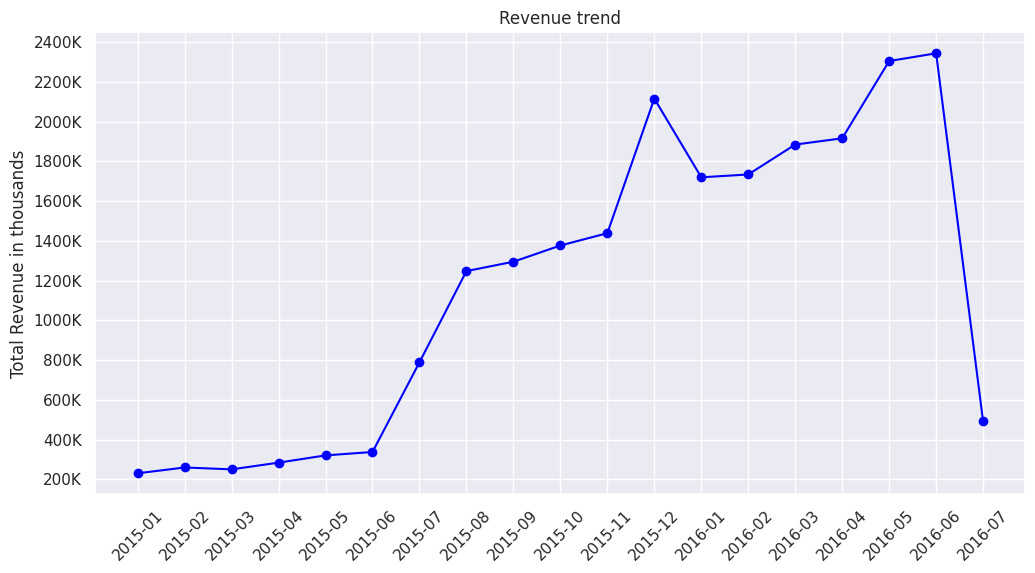

In [ ]:
revenue_by_month = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month.index.astype(str), revenue_by_month.values, marker='o', linestyle='-', color='blue')
plt.xticks(rotation = 45)
plt.locator_params(axis='y', nbins=13)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.ylabel('Total Revenue in thousands')
plt.title('Revenue trend')
plt.grid(True)
plt.show()

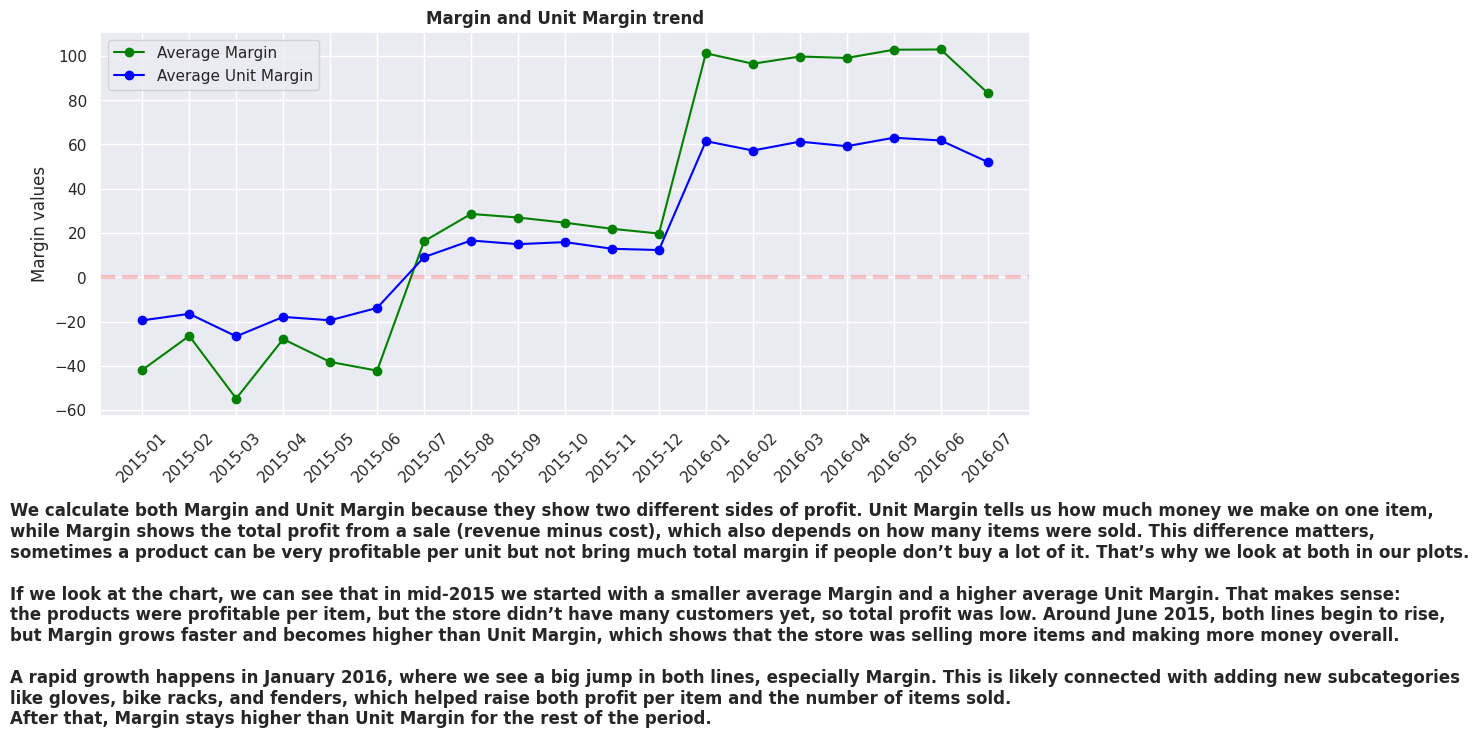

In [ ]:
#Group by Month and calculate mean for both Margin and Unit Margin
margin_by_month = df.groupby('Month')['Margin'].mean()
unit_margin_by_month = df.groupby('Month')['Unit Margin'].mean()

fig, ax = plt.subplots(figsize=(12, 8))

#Margin line
ax.plot(margin_by_month.index.astype(str), margin_by_month.values, marker='o', linestyle='-', color='green', label="Average Margin")

#Unit Margin line
ax.plot(unit_margin_by_month.index.astype(str), unit_margin_by_month.values, marker='o', linestyle='-', color='blue', label="Average Unit Margin")

ax.set_xticks(range(len(margin_by_month.index)))
ax.set_xticklabels(margin_by_month.index.astype(str), rotation=45)
ax.set_ylabel("Margin values")
ax.set_title("Margin and Unit Margin trend", fontweight='bold')
ax.axhline(y=0, color='red', lw=3, ls='--', alpha=0.2)
ax.legend()
ax.grid(True)

explanation = (
    "We calculate both Margin and Unit Margin because they show two different sides of profit. "
    "Unit Margin tells us how much money we make on one item,\nwhile Margin shows the total profit "
    "from a sale (revenue minus cost), which also depends on how many items were sold. "
    "This difference matters,\nsometimes a product can be very profitable per unit but not bring "
    "much total margin if people don’t buy a lot of it. That’s why we look at both in our plots.\n\n"
    "If we look at the chart, we can see that in mid‑2015 we started with a smaller average Margin "
    "and a higher average Unit Margin. That makes sense:\nthe products were profitable per item, "
    "but the store didn’t have many customers yet, so total profit was low. Around June 2015, "
    "both lines begin to rise,\nbut Margin grows faster and becomes higher than Unit Margin, "
    "which shows that the store was selling more items and making more money overall.\n\n"
    "A rapid growth happens in January 2016, where we see a big jump in both lines, especially Margin. "
    "This is likely connected with adding new subcategories\nlike gloves, bike racks, and fenders, "
    "which helped raise both profit per item and the number of items sold.\nAfter that, "
    "Margin stays higher than Unit Margin for the rest of the period."
)

fig.text(0.05, 0.01, explanation, ha='left', va='bottom', fontsize=12, fontweight='bold')

plt.subplots_adjust(bottom=0.4)
plt.show()


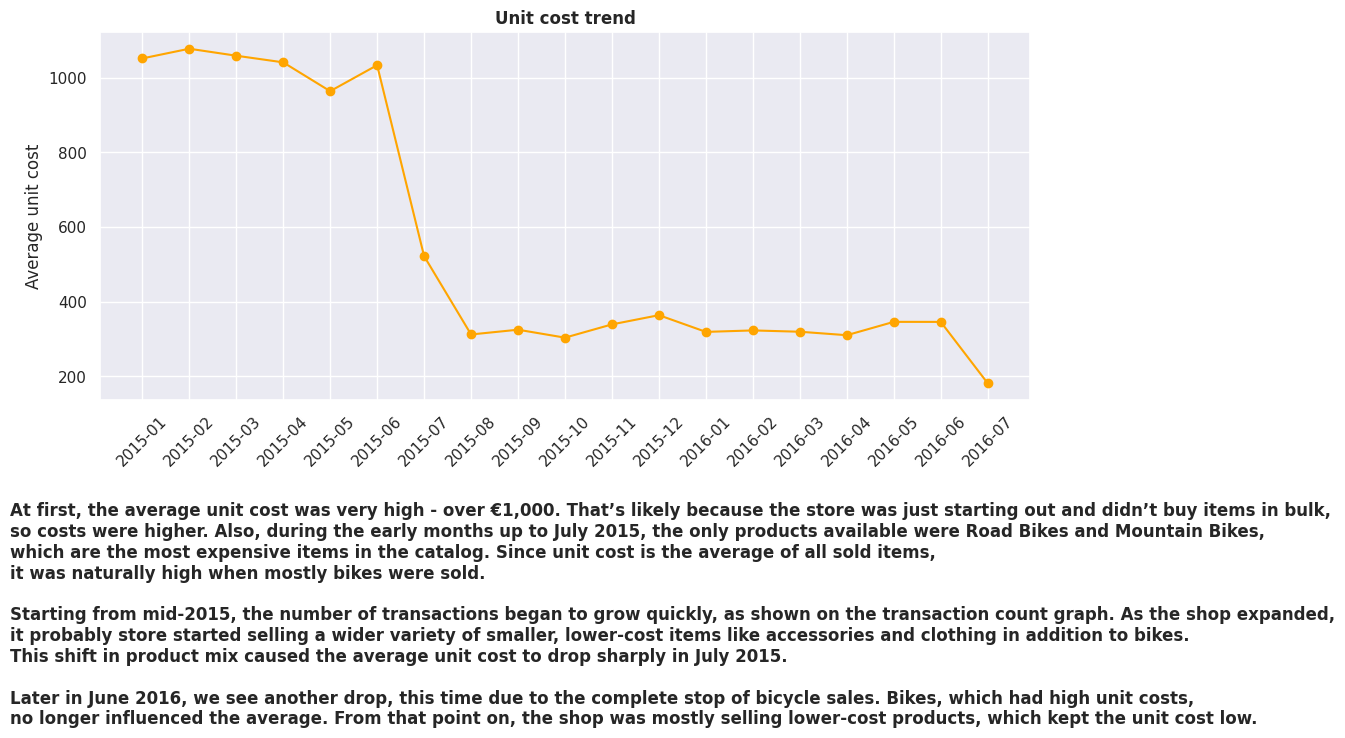

In [ ]:
#Unit cost trend
avg_unitcost_month = df.groupby('Month')['Unit Cost'].mean()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(avg_unitcost_month.index.astype(str), avg_unitcost_month.values, marker='o', linestyle='-', color='orange')
ax.set_xticks(range(len(avg_unitcost_month.index)))
ax.set_xticklabels(avg_unitcost_month.index.astype(str), rotation=45)
ax.set_ylabel('Average unit cost')
ax.set_title('Unit cost trend', fontweight='bold')
ax.grid(True)

explanation = (
    "At first, the average unit cost was very high - over €1,000. That’s likely because the store "
    "was just starting out and didn’t buy items in bulk,\nso costs were higher. Also, during the early months "
    "up to July 2015, the only products available were Road Bikes and Mountain Bikes,\nwhich are the most expensive items in the catalog. "
    "Since unit cost is the average of all sold items,\nit was naturally high when mostly bikes were sold.\n\n"
    "Starting from mid‑2015, the number of transactions began to grow quickly, as shown on the transaction count graph. "
    "As the shop expanded,\nit probably store started selling a wider variety of smaller, lower-cost items like accessories and clothing in addition to bikes. "
    "\nThis shift in product mix caused the average unit cost to drop sharply in July 2015.\n\n"
    "Later in June 2016, we see another drop, this time due to the complete stop of bicycle sales. "
    "Bikes, which had high unit costs,\nno longer influenced the average. From that point on, "
    "the shop was mostly selling lower‑cost products, which kept the unit cost low."
)

fig.text(0.05, 0.01, explanation, ha='left', va='bottom', fontsize=12,fontweight='bold')
plt.subplots_adjust(bottom=0.42)
plt.show()



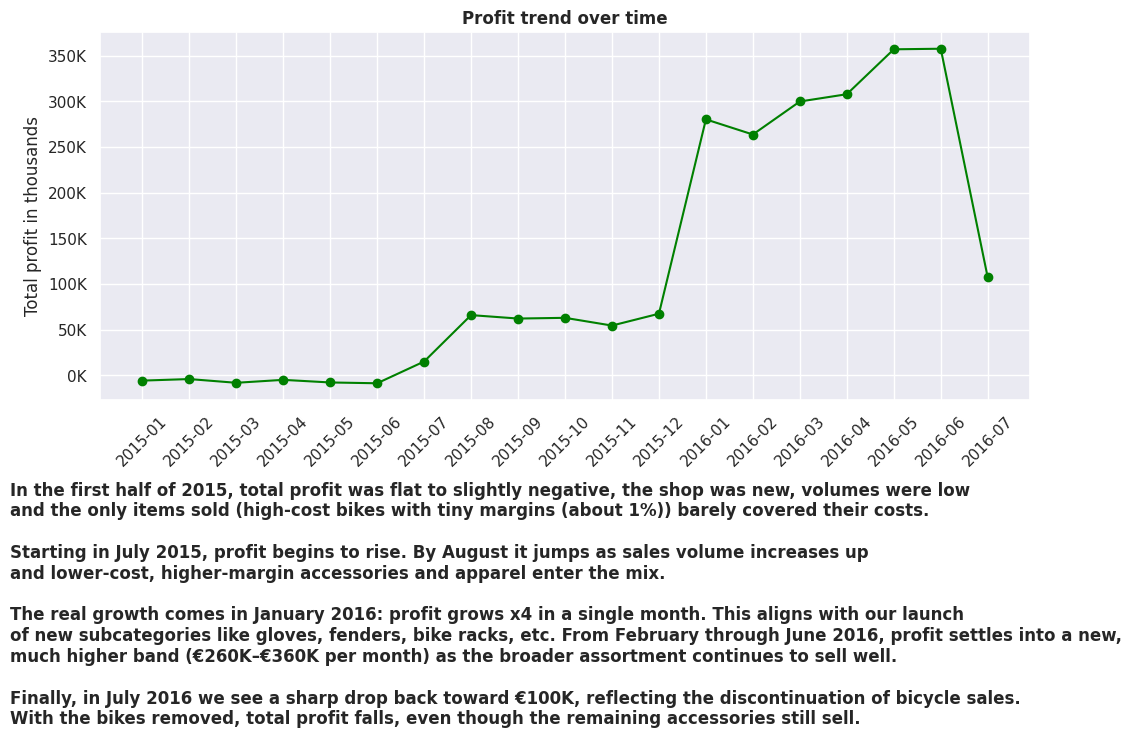

In [ ]:
#Aggregate total profit by month
profit_by_month = df.groupby('Month')['Margin'].sum()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(profit_by_month.index.astype(str), profit_by_month.values, marker='o', linestyle='-', color='green')
plt.xticks(rotation=45)
plt.locator_params(axis='y', nbins=13)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.ylabel('Total profit in thousands')
plt.title('Profit trend over time', fontweight='bold')
plt.grid(True)

explanation = (
    "In the first half of 2015, total profit was flat to slightly negative, the shop was new, volumes were low\n"
    "and the only items sold (high‑cost bikes with tiny margins (about 1%)) barely covered their costs.\n\n"
    "Starting in July 2015, profit begins to rise. By August it jumps as sales volume increases up\n"
    "and lower‑cost, higher‑margin accessories and apparel enter the mix.\n\n"
    "The real growth comes in January 2016: profit grows x4 in a single month. This aligns with our launch\n"
    "of new subcategories like gloves, fenders, bike racks, etc. "
    "From February through June 2016, profit settles into a new,\nmuch higher band (€260K–€360K per month) as the broader assortment continues to sell well.\n\n"
    "Finally, in July 2016 we see a sharp drop back toward €100K, reflecting the discontinuation of bicycle sales.\n"
    "With the bikes removed, total profit falls, even though the remaining accessories still sell."
)

#explanation text under the plot
fig.text(0.05, 0.01, explanation, ha='left', va='bottom', fontsize=12, fontweight='bold')
plt.subplots_adjust(bottom=0.42)
plt.show()



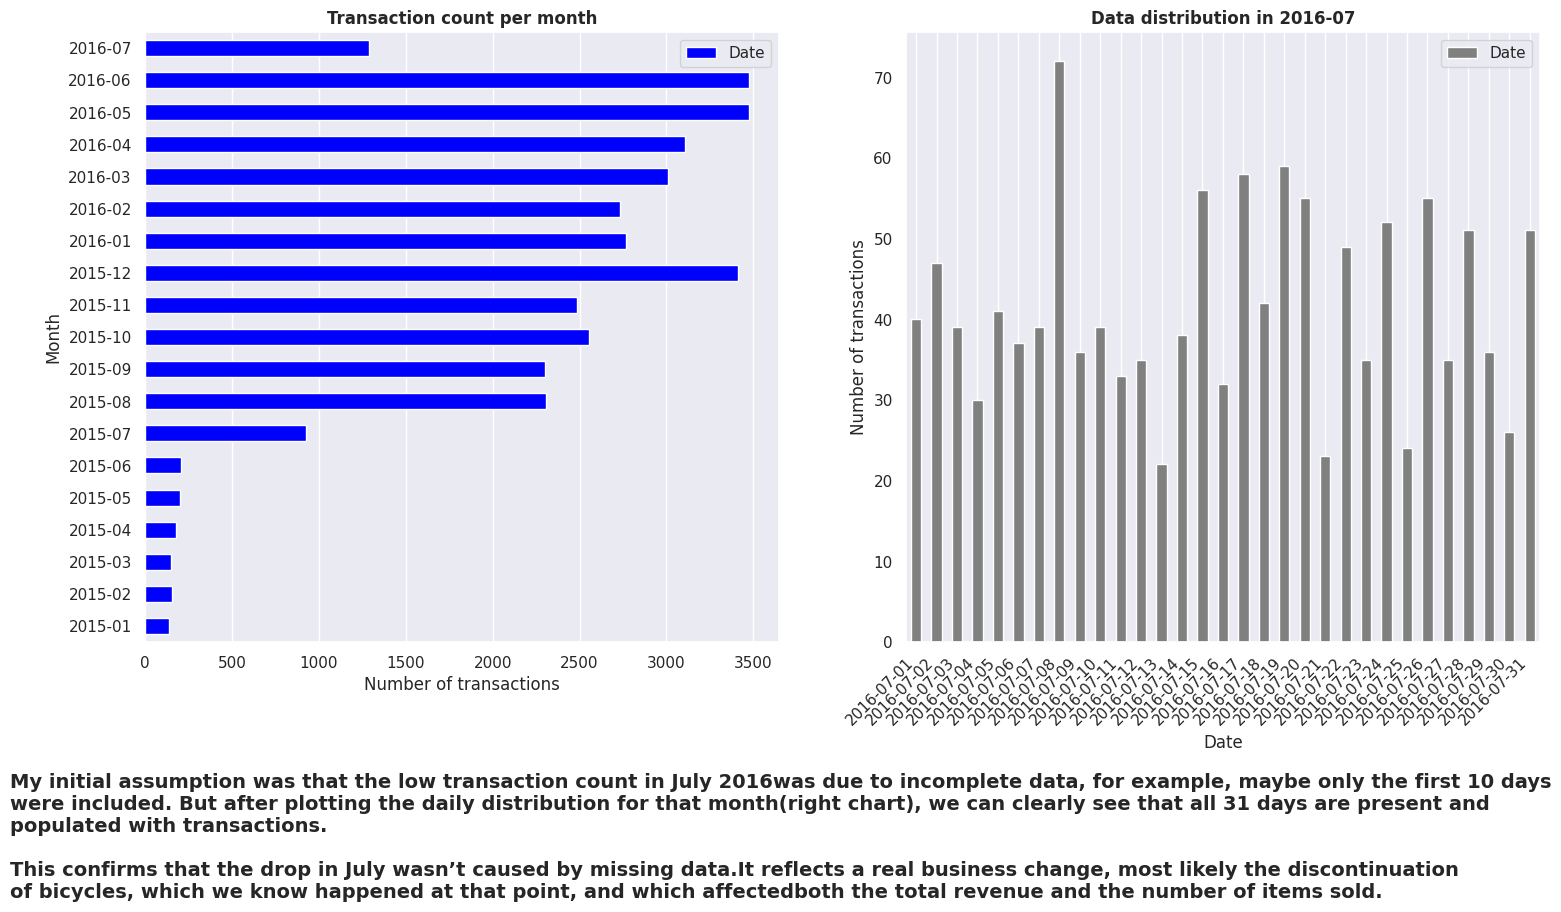

In [ ]:
monthly_counts = df.groupby('Month')['Date'].count()
last_month = df['Month'].max()
last_month_data = df[df['Month'] == last_month]
daily_counts = last_month_data.groupby(last_month_data['Date'].dt.date)['Date'].count()

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

#Subplot 1: Transaction count per month
monthly_counts.plot(kind='barh', color='blue', ax=axes[0])
axes[0].set_title("Transaction count per month", fontweight='bold')
axes[0].set_xlabel("Number of transactions")
axes[0].grid(axis='y')
axes[0].legend()

#Subplot 2: Data distribution in Last Month
daily_counts.plot(kind='bar', color='grey', ax=axes[1])
axes[1].set_title(f"Data distribution in {last_month}", fontweight='bold')
axes[1].set_ylabel("Number of transactions")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y')
axes[1].legend()

explanation = (
    "My initial assumption was that the low transaction count in July 2016"
    "was due to incomplete data, for example, maybe only the first 10 days\n"
    "were included. But after plotting the daily distribution for that month"
    "(right chart), we can clearly see that all 31 days are present and\n"
    "populated with transactions.\n\n"
    "This confirms that the drop in July wasn’t caused by missing data."
    "It reflects a real business change, most likely the discontinuation\n"
    "of bicycles, which we know happened at that point, and which affected"
    "both the total revenue and the number of items sold."
)

fig.text(0.05, 0.01, explanation, ha='left', va='bottom', fontsize=14, fontweight='bold')
plt.subplots_adjust(bottom=0.27)
plt.show()


# Geographical analysis

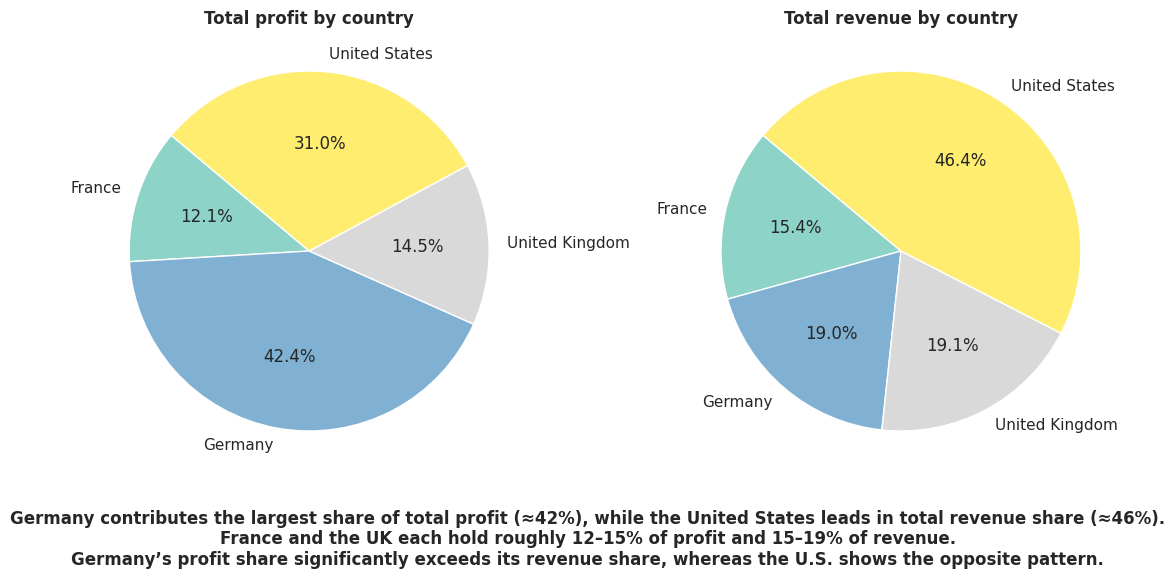

<Figure size 640x480 with 0 Axes>

In [ ]:
country_profit  = df.groupby('Country')['Margin'].sum()
country_revenue = df.groupby('Country')['Revenue'].sum()
colors = get_colormap4(len(country_profit))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    country_profit,
    labels=country_profit.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
axes[0].set_title('Total profit by country\n', fontweight='bold')
axes[0].axis('equal')

axes[1].pie(
    country_revenue,
    labels=country_revenue.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
axes[1].set_title('Total revenue by country\n', fontweight='bold')
axes[1].axis('equal')

explanation = (
    "Germany contributes the largest share of total profit (≈42%), while the United States leads in total revenue share (≈46%).\n"
    "France and the UK each hold roughly 12–15% of profit and 15–19% of revenue.\n"
    "Germany’s profit share significantly exceeds its revenue share, whereas the U.S. shows the opposite pattern."
)

fig.text(0.5, 0.02, explanation, ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.subplots_adjust(bottom=0.22)
plt.show()

plt.tight_layout()
plt.show()

**Germany’s outsized profitability isn’t an accident, it reflects both market structure and customer behavior. Although the U.S. makes nearly twice the revenue, American margins goes under aggressive discounting and a mass‑market focus: bikes alone lose money on average, and accessories and apparel barely get to 15%.**

**In contrast, German retailers benefit from all categories of products. Studies of European bike markets show German shops seldom run the deep “loss‑leader” sales common in the U.S.(In the U.S., it’s common for shops to run big sales where they sell some products very cheap, even below their cost, to attract customers. These are called “loss-leader” sales.) The idea is to get people into the store, hoping they’ll also buy more profitable things.**

**In Germany, stores usually don’t use this tactic. They prefer to keep steady, reasonable prices instead of offering big discounts. That means they don't lose money on purpose to boost foot traffic, so they often keep better margins. Instead, they maintain list prices on premium gear, which supports subcategory margins above 30 % for items like fenders (33.7 %), racks (29.8 %), and jerseys (29.6 %).**

**Stronger willingness to pay for quality.
Germany’s ingrained cycling culture, where commuting, touring, and weekend rides are a way of life-drives demand for higher-end products. Research from the German Bicycle Industry Association consistently finds that German consumers favor durability and performance over bargain pricing, allowing retailers to command healthier spreads.**

**When we compare subcategory margins side‑by‑side, Germany leads every line:**

Accessories: 30.9 % (vs. 15.0 % in the U.S.)

Clothing: 29.5 % (vs. 13.0 %)

Bikes: 16.9 % (vs. –2.3 %)


In [ ]:
country_agg = (
    df
    .groupby('Country')
    .agg(Total_Revenue = ('Revenue','sum'),
         Total_Profit  = ('Margin', 'sum'))
)
country_agg['Weighted_Margin_%'] = country_agg['Total_Profit'] / country_agg['Total_Revenue'] * 100
country_agg.sort_values('Weighted_Margin_%', ascending=False)


,Total_Revenue,Total_Profit,Weighted_Margin_%
Country,,,
Germany,4244510.0,958825.0,22.589769
France,3446104.0,272657.0,7.912036
United Kingdom,4276220.0,328955.0,7.692658
United States,10377742.0,701165.0,6.756431


In [ ]:
#Aggregate
mix = (df.groupby(['Country', 'Product Category']).agg(Total_Revenue=('Revenue', 'sum'),Total_Profit = ('Margin',  'sum')).reset_index())

mix['Margin %'] = mix['Total_Profit'] / mix['Total_Revenue'] * 100

#Style with color on all metric columns
styled = (
    mix.style
       .background_gradient(
           cmap='RdYlGn',
           subset=['Total_Revenue', 'Total_Profit', 'Margin %'],
           axis=0
       )
       .format({
           'Total_Revenue': '€{:,}',
           'Total_Profit': '€{:,}',
           'Margin %': '{:.1f}%'
       })
)

display(styled)


,Country,Product Category,Total_Revenue,Total_Profit,Margin %
0,France,Accessories,"€1,099,177.0","€193,659.0",17.6%
1,France,Bikes,"€1,872,603.0","€14,664.0",0.8%
2,France,Clothing,"€474,324.0","€64,334.0",13.6%
3,Germany,Accessories,"€1,289,410.0","€398,403.0",30.9%
4,Germany,Bikes,"€2,465,427.0","€416,069.0",16.9%
5,Germany,Clothing,"€489,673.0","€144,353.0",29.5%
6,United Kingdom,Accessories,"€1,309,048.0","€226,998.0",17.3%
7,United Kingdom,Bikes,"€2,415,117.0","€15,631.0",0.6%
8,United Kingdom,Clothing,"€552,055.0","€86,326.0",15.6%
9,United States,Accessories,"€3,723,029.0","€559,709.0",15.0%


In [ ]:
#Compute the average Margin % by Country and Sub Category
subcat_margin = (
    df
    .groupby(['Country', 'Sub Category'])['Margin %']
    .mean()
    .unstack()
)

#Colormaps and value ranges
neg_min = subcat_margin[subcat_margin < 0].min().min()  # most negative
pos_max = subcat_margin[subcat_margin > 0].max().max()  # most positive
reds = cm.get_cmap('Reds')
greens = cm.get_cmap('Greens')

#Styling function
import matplotlib.colors as mcolors
def color_map(val):
    if val < 0:
        ratio = val / neg_min
        rgba = reds(ratio)
    else:
        ratio = val / pos_max
        rgba = greens(ratio)
    return f'background-color: {mcolors.to_hex(rgba)}'

styled = (
    subcat_margin.style
                  .applymap(color_map)
                  .format("{:.1f}%")
)

display(styled)

<ipython-input-24-2bd3d704f143>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds = cm.get_cmap('Reds')
<ipython-input-24-2bd3d704f143>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  greens = cm.get_cmap('Greens')
<ipython-input-24-2bd3d704f143>:31: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_map)


Sub Category,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
Country,,,,,,,,,,,,,,,,,
France,22.1%,13.5%,12.9%,10.5%,13.6%,14.8%,16.9%,14.4%,15.8%,9.9%,-3.2%,-4.1%,4.2%,7.8%,13.3%,-2.6%,10.7%
Germany,35.7%,29.8%,29.9%,28.6%,30.5%,33.7%,31.0%,30.3%,31.7%,28.3%,17.5%,15.6%,29.6%,29.1%,30.1%,16.3%,28.7%
United Kingdom,22.5%,16.0%,16.5%,14.4%,16.4%,21.6%,18.9%,16.6%,17.7%,14.4%,0.4%,-0.8%,14.0%,13.7%,16.2%,1.1%,14.9%
United States,19.6%,13.5%,14.7%,12.3%,14.5%,18.9%,17.1%,14.1%,13.6%,12.0%,-3.0%,-3.7%,11.7%,12.1%,14.2%,-2.1%,11.9%


# Consumer profile

                    Revenue
Customer Gender            
F                10932634.0
M                11411942.0


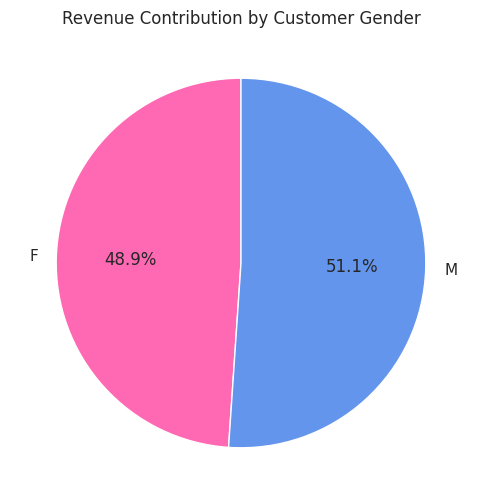

In [ ]:
#checking how much revenue was generated by each gender
revenue_gender = df.groupby('Customer Gender')['Revenue'].sum()

#calculating percentage contribution of each gender to total revenue
revenue_gender_percentage = (revenue_gender / revenue_gender.sum()) * 100

#creating a DataFrame to display the revenue and percentage
revenue_gender_df = pd.DataFrame({
    'Revenue': revenue_gender
})

print(revenue_gender_df)

#pie chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_gender_percentage, labels = revenue_gender.index, colors = ['#ff69b4', '#6495ed'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Contribution by Customer Gender')
plt.show()

In [ ]:
#Creating bins (5 age intervals)
bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55+']

#Creating new column
df["Age group"] = pd.cut(df["Customer Age"], bins = bins, labels = labels, right = False)

grouped = df.groupby(["Customer Gender","Age group"])["Revenue"].sum()

<ipython-input-26-8023da70fdcd>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["Customer Gender","Age group"])["Revenue"].sum()


<ipython-input-27-0626880ba86d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age = df.groupby(['Age group', 'Product Category'])['Revenue'].sum().reset_index()
<ipython-input-27-0626880ba86d>:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=revenue_by_age, x='Age group', y='Revenue', palette = colors, hue='Product Category')


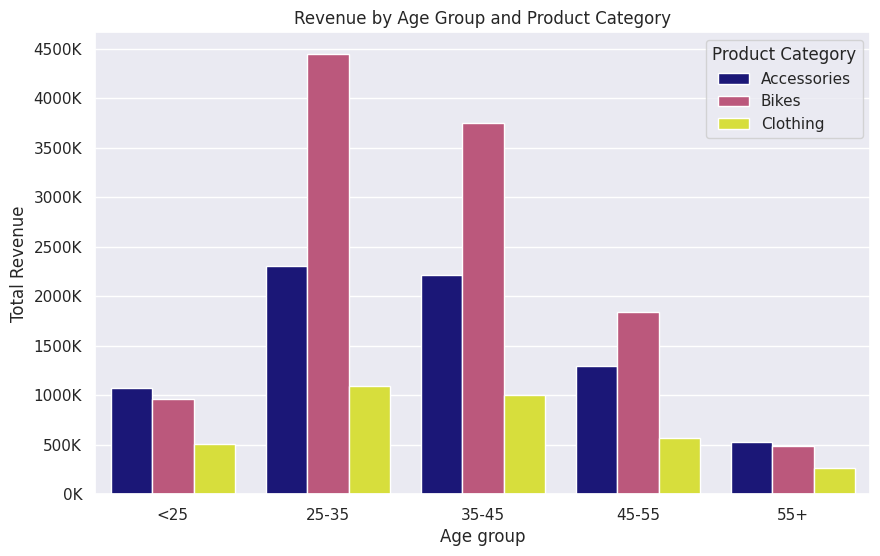

In [ ]:
revenue_by_age = df.groupby(['Age group', 'Product Category'])['Revenue'].sum().reset_index()

y_max = revenue_by_age['Revenue'].max()

colors = get_colormap1(3)
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_age, x='Age group', y='Revenue', palette = colors, hue='Product Category')
plt.title('Revenue by Age Group and Product Category')
plt.locator_params(axis='y', nbins=13)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
plt.ylabel('Total Revenue')
plt.show()


<ipython-input-171-b269ebdc386c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age group', 'Sub Category'])['Unit Price']


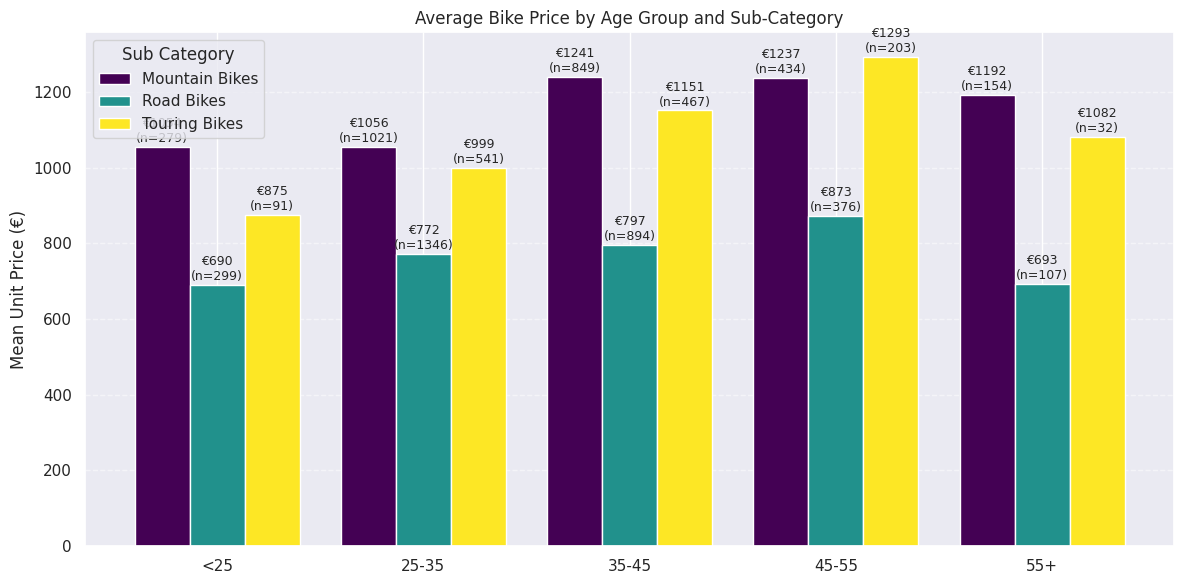

In [ ]:
#Filter to only bike purchases
bikes = df[df['Product Category'] == 'Bikes'].copy()

#mean price and counts per age group & subcategory
stats = (
    bikes
    .groupby(['Age group', 'Sub Category'])['Unit Price']
    .agg(['mean','count'])
    .rename(columns={'mean':'Mean_Price','count':'N'})
    .reset_index()
)

#Pivot to wide form
mean_prices  = stats.pivot(index='Age group', columns='Sub Category', values='Mean_Price')
count_prices = stats.pivot(index='Age group', columns='Sub Category', values='N')

#Plot grouped bar chart
age_groups = mean_prices.index.tolist()
subcats    = mean_prices.columns.tolist()
x = np.arange(len(age_groups))
width = 0.8 / len(subcats)

#get three distinct colors
colors = get_colormap2(len(subcats))

fig, ax = plt.subplots(figsize=(12, 6))

for i, cat in enumerate(subcats):
    xpos = x + (i - (len(subcats)-1)/2) * width
    bars = ax.bar(xpos, mean_prices[cat], width, label=cat, color=colors[i])
    #annotate each bar with mean price and sample size
    for bar, mean, n in zip(bars, mean_prices[cat], count_prices[cat]):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5,
            f"€{mean:.0f}\n(n={int(n)})",
            ha='center', va='bottom', fontsize=9
        )

ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.set_ylabel('Mean Unit Price (€)')
ax.set_title('Average Bike Price by Age Group and bikes Sub‑Category')
ax.legend(title='Sub Category')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#**What this tells us?**
25–45 yo category are volume leaders, they buy the most units (especially bikes) but at mid‑range prices.

45–55 yo category are premium buyers, they spend slightly less in quantity but choose the highest‑spec, highest‑priced models across all bike types.

Under 25s yo start small, mostly accessories.

55+ is a niche, lower volumes and moderate pricing, perhaps older models or “replacement” buys rather than new high‑end gear.
#**Actionable takeaway:**

Target 25–35 for high‑volume launches and bundle offers.

Upsell 35–55 with top‑tier mountain, road, and touring models (they have the budget for premium items).

Engage < 25 through accessory‑first promotions to build loyalty before the big bike spend.







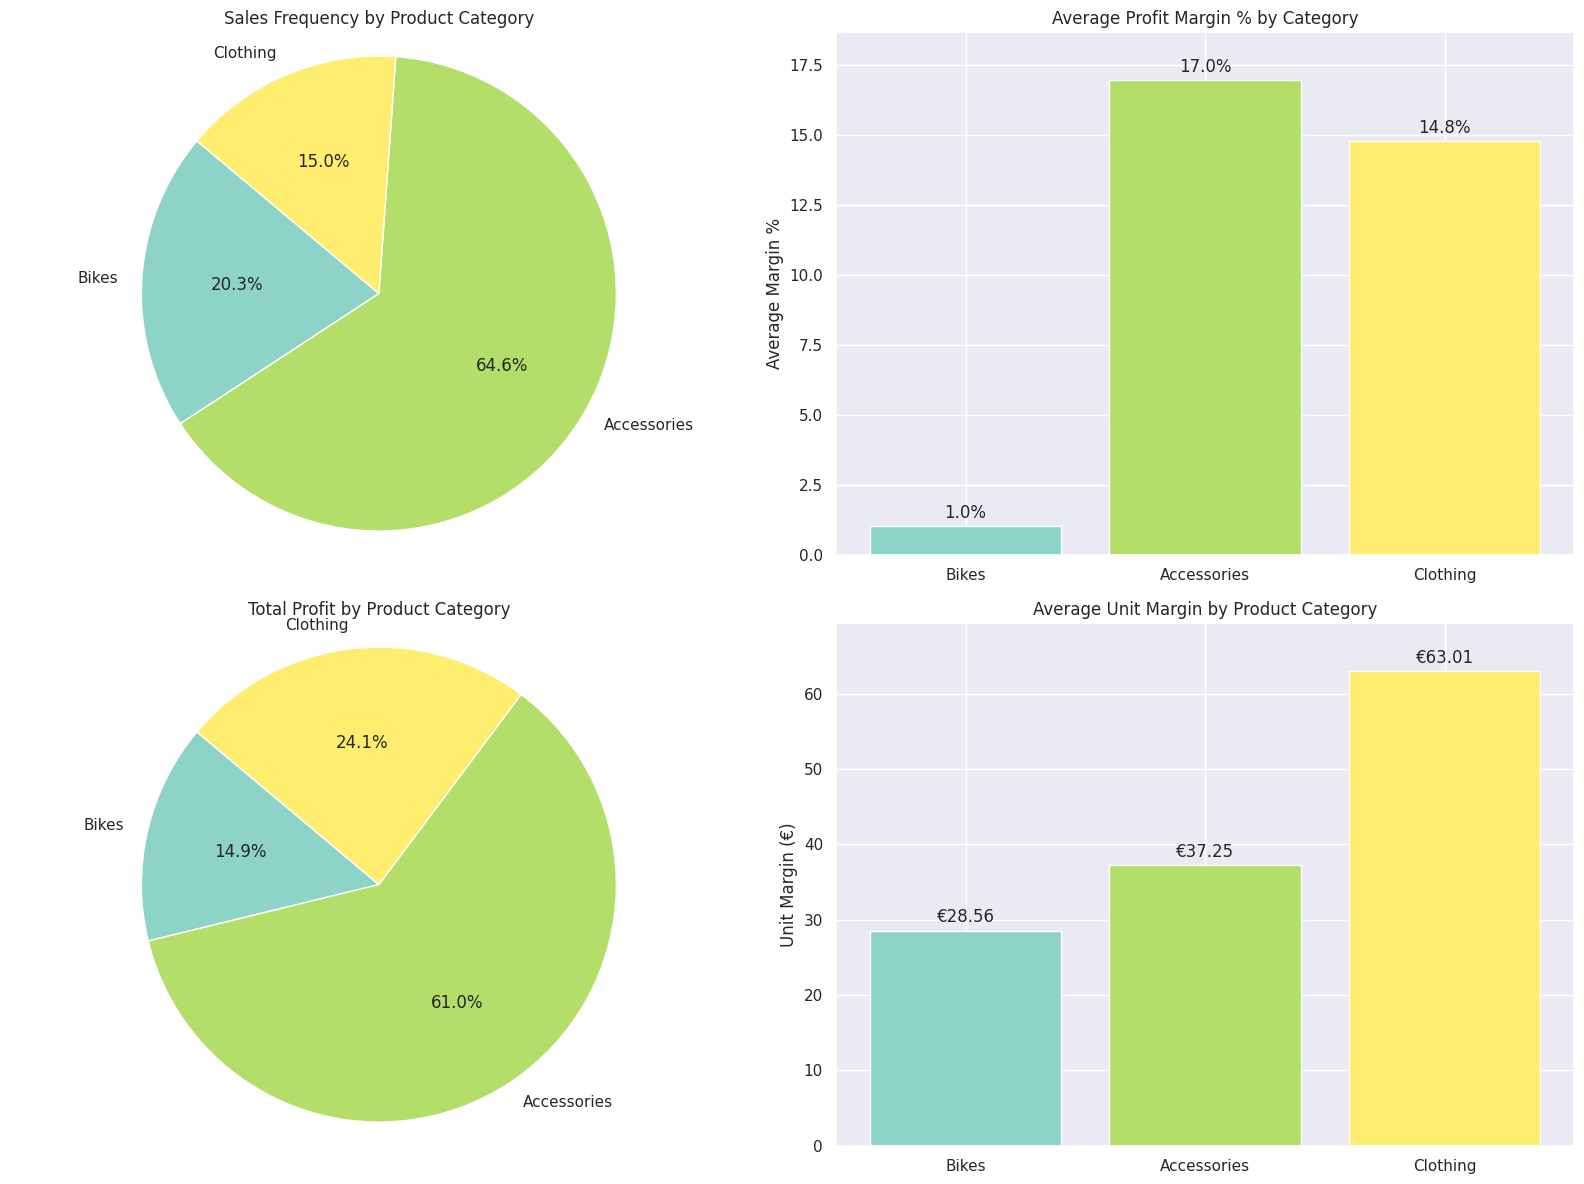

In [ ]:
categories = ['Bikes', 'Accessories', 'Clothing']

freq_cat = df['Product Category'].value_counts()[categories]
unit_margin_cat = df.groupby('Product Category')['Unit Margin'].mean()[categories]
avg_margin = df.groupby('Product Category')['Margin %'].mean().loc[categories]

profit_by_cat = df.groupby('Product Category')['Margin'].sum()
profit_cat = profit_by_cat[categories]

colors = get_colormap4(len(categories))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Sales frequency pie
axes[0, 0].pie(freq_cat, labels=categories, autopct='%1.1f%%',
               startangle=140, colors=colors)
axes[0, 0].set_title('Sales Frequency by Product Category')

#Average margin % bar
bars1 = axes[0, 1].bar(categories, avg_margin.values, color=colors)
axes[0, 1].bar_label(bars1, fmt='%.1f%%', padding=3)
axes[0, 1].set_title('Average Profit Margin % by Category')
axes[0, 1].set_ylabel('Average Margin %')
axes[0, 1].set_ylim(0, avg_margin.max() * 1.1)
axes[0, 1].tick_params(axis='x', rotation=0)

#Total profit pie
axes[1, 0].pie(profit_cat, labels=categories, autopct='%1.1f%%',
               startangle=140, colors=colors)
axes[1, 0].set_title('Total Profit by Product Category')

#Average unit margin bar
bars2 = axes[1, 1].bar(categories, unit_margin_cat.values, color=colors)
axes[1, 1].bar_label(bars2, fmt='€%.2f', padding=3)
axes[1, 1].set_title('Average Unit Margin by Product Category')
axes[1, 1].set_ylabel('Unit Margin (€)')
axes[1, 1].set_ylim(0, unit_margin_cat.max() * 1.1)
axes[1, 1].tick_params(axis='x', rotation=0)

for ax in (axes[0, 0], axes[1, 0]):
    ax.axis('equal')

plt.tight_layout()
plt.show()


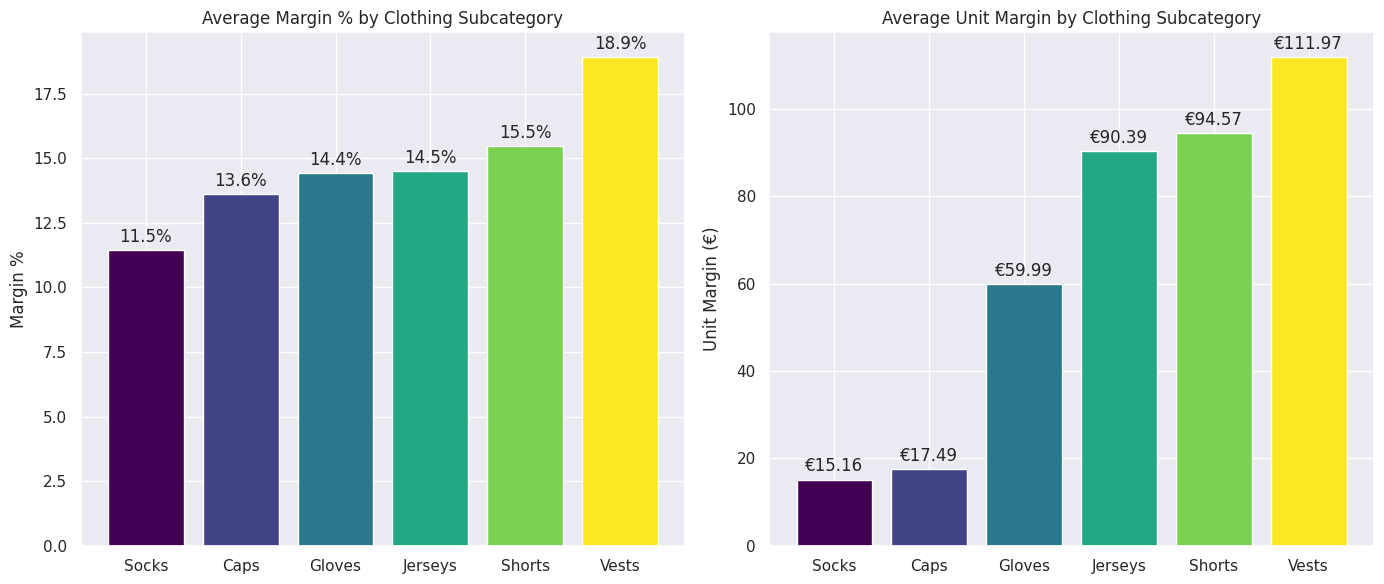

In [ ]:
clothing_df = df[df['Product Category'] == 'Clothing']
unit_margin = clothing_df.groupby('Sub Category')['Unit Margin'].mean().sort_values()
margin_pct  = clothing_df.groupby('Sub Category')['Margin %'].mean().loc[unit_margin.index].sort_values()

categories = unit_margin.index.tolist()
colors     = get_colormap2(len(categories))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Bar chart for Margin %
bars1 = axes[0].bar(categories, margin_pct.values, color=colors)
axes[0].bar_label(bars1, fmt='%.1f%%', padding=3)
axes[0].set_title('Average Margin % by Clothing Subcategory')
axes[0].set_ylabel('Margin %')
axes[0].tick_params(axis='x', rotation=0)

#Bar chart for Unit Margin (€)
bars2 = axes[1].bar(categories, unit_margin.values, color=colors)
axes[1].bar_label(bars2, fmt='€%.2f', padding=3)
axes[1].set_title('Average Unit Margin by Clothing Subcategory')
axes[1].set_ylabel('Unit Margin (€)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


###**Sales frequency by category**  
- **Accessories** account for nearly 2/3 of all transactions (≈ 65 %), more than both **Bikes** (20 %) and **Clothing** (15 %).  
- This tells us that most visits involve at least one accessory purchase, accessories are the true workhorses of transaction volume.

###**Average profit margin % by category**  
- **Accessories** have highest margin of **17.0 %**, followed by **Clothing 14.8 %**, while **Bikes** margin equals just **1.0 %**.  
- Even though bikes make up 20 % of transactions, their tiny margins mean they hardly contribute to overall profitability.

###**Profit share by category**  
- Accessories take **61 %** of total profit, clothing about **24 %**, and bikes only **15 %**.  

###**Average unit margin by category**  
- **Clothing** leads in price per item (≈ €63), followed by **Accessories** (≈ €37) and **Bikes** (≈ €29).  
- So even though clothing is lower‑volume than accessories, each garment gives a bigger per‑unit profit.

---

##**Clothing subcategories**

###**Margin % by subcategory**  
- **Vests** top the list with **18.9 %**, then **Shorts** at **15.5 %**, **Jerseys** and **Gloves** around **14–15 %**, down to **Caps** at **13.6 %** and **Socks** at **11.5 %**.  
- This shows Vests and Shorts are your most profitable clothing lines, while Socks and Caps are lower‑margin “entry” items.

###**Unit margin (€) by subcategory**  
- **Vests** again lead with **€112**, followed by **Shorts** (**€95**) and **Jerseys** (**€90**).  
- **Gloves** sit around **€60**, but **Caps** and **Socks** are low (≈ €17 – €15).  
- So high‑end apparel like vests and shorts not only have better percentages but also deliver real euro‑per‑unit heft.

---

### **Key takeaways**

1. **Accessories** are the volume and profit engine.  
2. **Bikes** drive traffic but contribute very little to profit—use them to upsell higher‑margin add‑ons.  
3. Within **Clothing**, **Vests** and **Shorts** are star performers; **Caps** and **Socks** are low‑margin, low‑dollar “entry” pieces.  


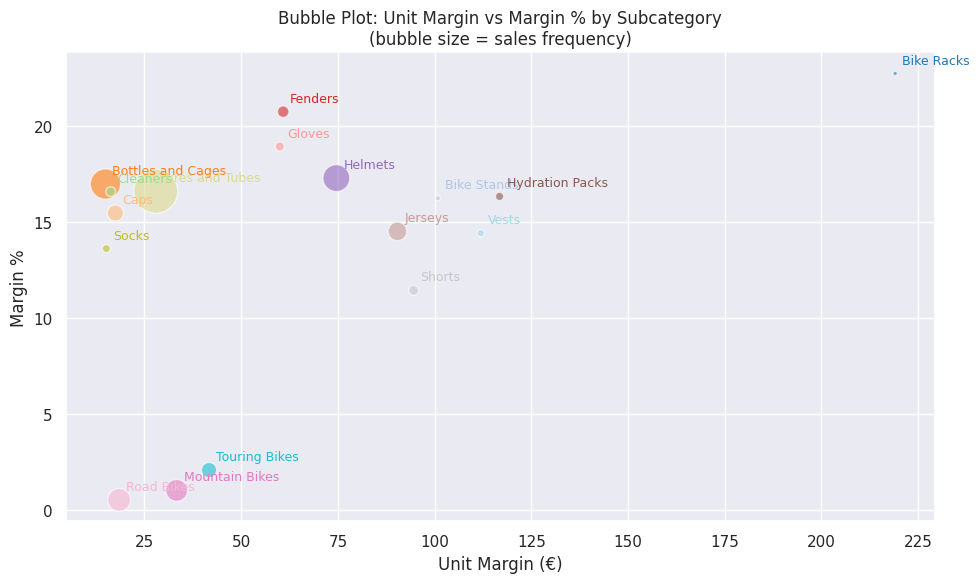

In [ ]:
unit_margin = df.groupby('Sub Category')['Unit Margin'].mean()
margin_pct = df.groupby('Sub Category')['Margin %'].mean()
freq = df['Sub Category'].value_counts().loc[unit_margin.index]

#Scale bubble sizes (largest freq → 1000)
sizes = freq / freq.max() * 1000

#Generate distinct colors
cmap = plt.cm.tab20
colors = cmap(np.linspace(0, 1, len(unit_margin)))

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    unit_margin,
    margin_pct,
    s=sizes,
    c=colors,
    alpha=0.6,
    edgecolors='w'
)

#Add labels offset to avoid collision
for (cat, x0, y0, col) in zip(unit_margin.index, unit_margin.values, margin_pct.values, colors):
    ax.annotate(
        cat,
        xy=(x0, y0),
        xytext=(5, 5),
        textcoords='offset points',
        color=col,
        fontsize=9,
        ha='left',
        va='bottom'
    )

ax.set_xlabel('Unit Margin (€)')
ax.set_ylabel('Margin %')
ax.set_title('Bubble Plot: Unit Margin vs Margin % by Subcategory\n(bubble size = sales frequency)')
ax.grid(True)
plt.tight_layout()
plt.show()


**I use bubble plots because they are 3 dimentional and allow to quickly visually identify gaps between margins and volume. Each circle represents a sub category, its horizontal position showing the unit margin in euros (how much profit you make on each item), its vertical position giving the margin percentage (what share of each sale you keep after cost), and its size reflecting how often that item is sold.**

**Bikes: Road, Mountain, Touring, cluster down in the lower left corner: they have low unit margins (€30–€50) and tiny percentage margins (around 1–2 %), yet their bubbles are fairly large. That visual gap tells the story we saw earlier: bikes drive traffic and revenue volume, but contribute almost no profit.**

**On the opposite side, premium accessories like Bike Racks and Hydration Packs sit up in the upper‑right, with unit margins of €120 and percentage margins in the high 15-20%. Their bubbles are smaller, fewer orders but each sale brings a real punch for profit.**

**Between those extremes are the mid‑range accessories: Gloves, Fenders, Helmets, Jerseys—clustered around €60–€90 unit margin and 15–20 % margin, with medium sized bubbles showing solid sales volume. And in the left center we see staples like Tires & Tubes, Caps, and Cleaners: these have modest unit margins (€15–€50) and moderate percentage margins (12–17 %), and their large bubbles confirm they are your everyday workhorses.**


<ipython-input-31-7141912e57e0>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Sub Category'])


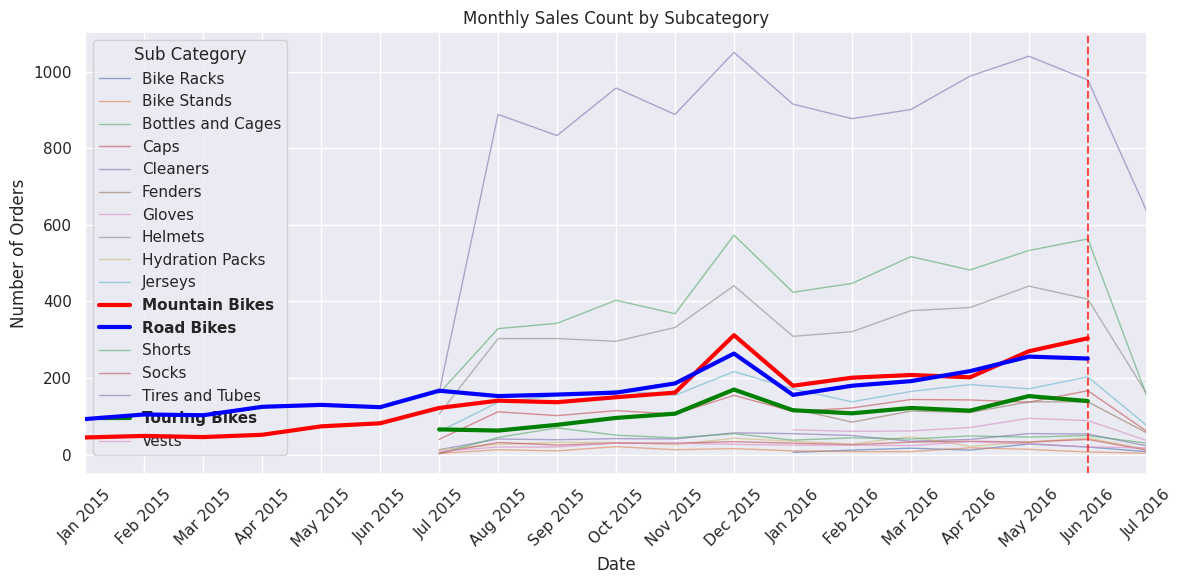

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
ts = (
    df
    .set_index('Date')
    .groupby([pd.Grouper(freq='M'), 'Sub Category'])
    .size()
    .unstack()
)

fig, ax = plt.subplots(figsize=(12, 6))
ts.plot(ax=ax)

highlight = ['Mountain Bikes', 'Road Bikes', 'Touring Bikes']
color_map = {
    'Mountain Bikes': 'red',
    'Road Bikes': 'blue',
    'Touring Bikes': 'green'
}

for line in ax.get_lines():
    lbl = line.get_label()
    if lbl in highlight:
        line.set_linewidth(3)
        line.set_alpha(1.0)
        line.set_color(color_map[lbl])
        line.set_zorder(10)
    else:
        line.set_alpha(0.6)
        line.set_linewidth(1)

#---
ax.axvline(pd.to_datetime('2016-06-01'),
           linestyle='--', color='red', linewidth=1.5, alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles, labels, title='Sub Category')
for text in leg.get_texts():
    if text.get_text() in highlight:
        text.set_fontweight('bold')

ax.set_title('Monthly Sales Count by Subcategory')
ax.set_ylabel('Number of Orders')
ax.set_xticks(ts.index)
ax.set_xticklabels([d.strftime('%b %Y') for d in ts.index], rotation=45)
plt.tight_layout()
plt.show()


**This line plot shows the monthly sales trend for each subcategory. We clearly see that after June 2016 (marked with a red dashed line), bike sales drop to zero, which smeans that the shop stopped selling them at that point. Around this time all other subcategories go down as well.**

**My hypothesis is that bicycles played a central role in driving overall sales. Many of the other items like helmets, fenders, or jerseys are often bought together with a bike. So once bikes disappeared from the catalog, the demand for those products dropped too. The idea is that bikes acted as an anchor product, and their removal had an effect across the rest of the store.**

# **Explanation of my hypothesis**

When customers walk into a bike shop, their primary goal is almost always to find a new bicycle, they’ve come for that “anchor” purchase. As they browse frames, test‑ride models, and compare specs, they’re naturally exposed to complementary gear: helmets on the shelf above the mountain bikes, fenders hanging next to touring models, jerseys draped on racks nearby. In retail theory this is called the “destination product” effect — your bicycle is the draw, and everything else is an “adjunct purchase” that benefits from that foot traffic.

Sales in specialty stores are impulse or add‑on buys tied to a primary item. Shoppers come in to buy a bike, then “while I’m here…” grab a helmet, pick up a pair of gloves, or try on a jersey. Those cross‑category trips boost both basket size and overall profitability.

If you remove the destination item, in this case, bicycles, the whole shopping journey changes. There’s nothing to attract customers into the store in the first place, so even your standalone accessories lose their context. That explains why, once bikes disappeared from the catalog after June 2016, sales of related items like helmets, fenders, and jerseys collapsed as well: without the anchor, the halo around those subcategories vanished.

<ipython-input-176-94a70a09e924>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Sub Category'])
<ipython-input-176-94a70a09e924>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Sub Category'])
<ipython-input-176-94a70a09e924>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Sub Category'])


Subcategories sold in 2015-12:
  0: Bike Stands
  1: Bottles and Cages
  2: Caps
  3: Cleaners
  4: Helmets
  5: Hydration Packs
  6: Jerseys
  7: Mountain Bikes
  8: Road Bikes
  9: Shorts
  10: Socks
  11: Tires and Tubes
  12: Touring Bikes
  13: Vests

Subcategories sold in 2016-01:
  0: Bike Racks
  1: Bike Stands
  2: Bottles and Cages
  3: Caps
  4: Cleaners
  5: Fenders
  6: Gloves
  7: Helmets
  8: Hydration Packs
  9: Jerseys
  10: Mountain Bikes
  11: Road Bikes
  12: Shorts
  13: Socks
  14: Tires and Tubes
  15: Touring Bikes
  16: Vests



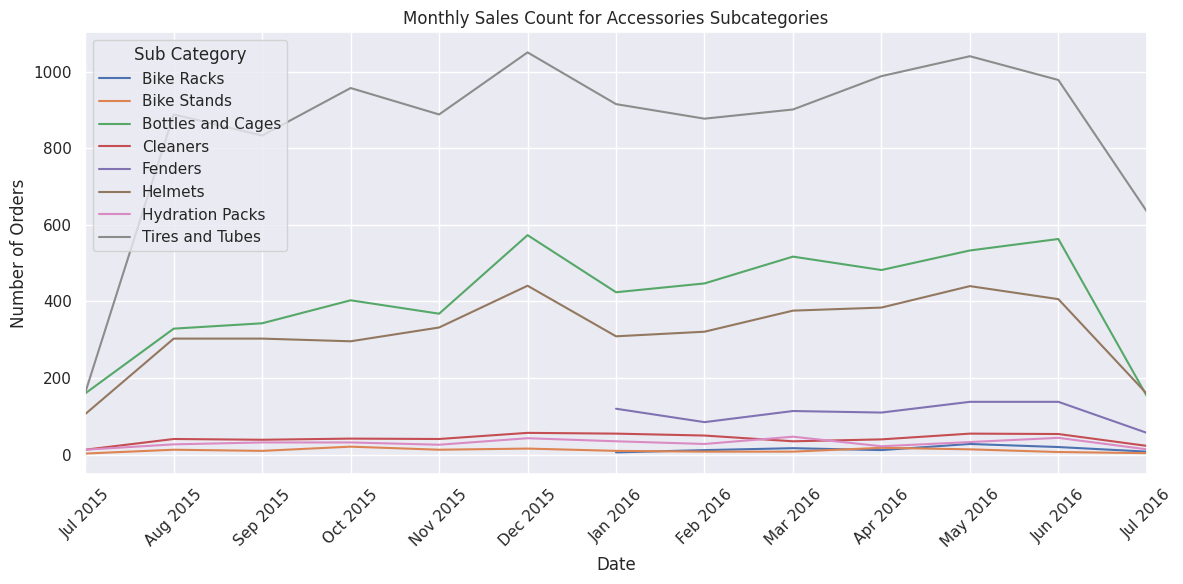

<ipython-input-176-94a70a09e924>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Sub Category'])


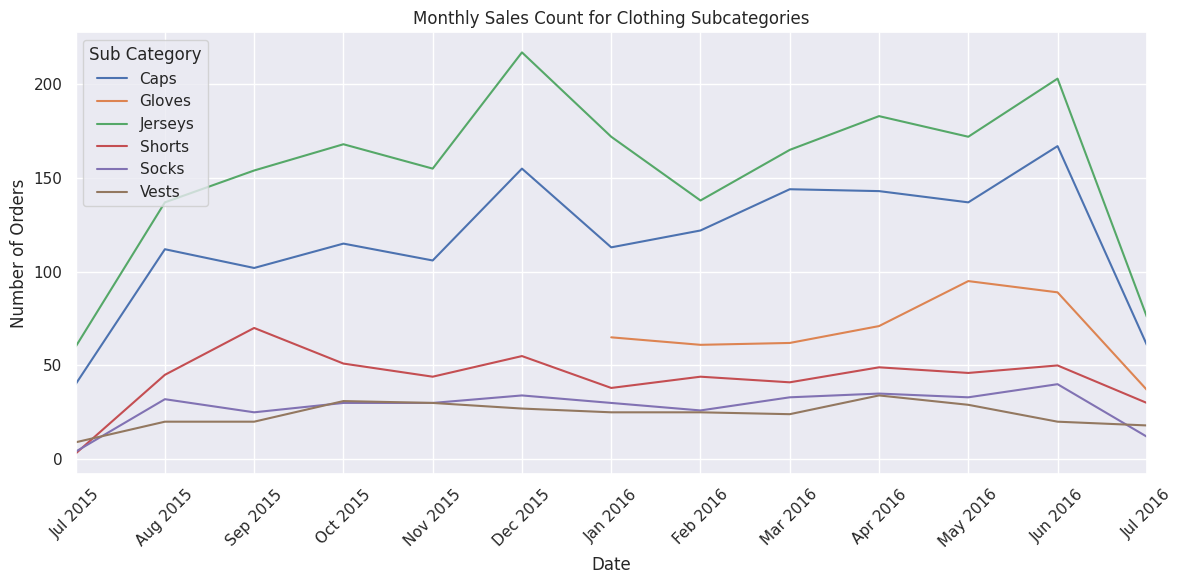

<ipython-input-176-94a70a09e924>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Sub Category'])


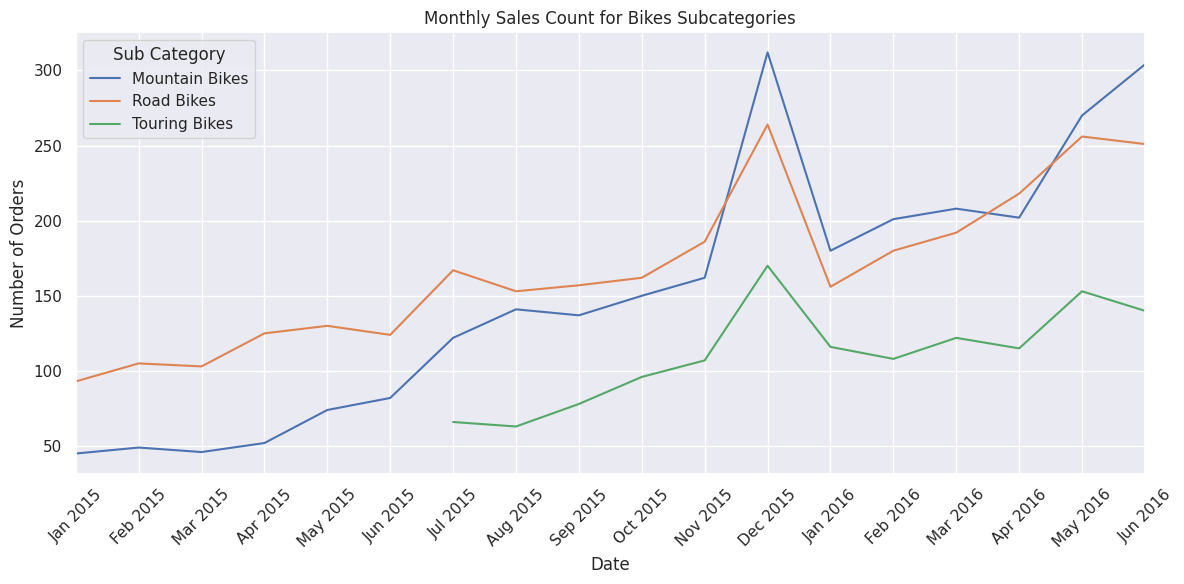

In [ ]:
def plot_subcategory_sales(category):
    category_df = df[df['Product Category'] == category]

    ts = (
        category_df
        .set_index('Date')
        .groupby([pd.Grouper(freq='M'), 'Sub Category'])
        .size()
        .unstack()
    )

    fig, ax = plt.subplots(figsize=(12, 6))
    ts.plot(ax=ax)
    ax.set_title(f'Monthly Sales Count for {category} Subcategories')
    ax.set_ylabel('Number of Orders')
    ax.set_xticks(ts.index)
    ax.set_xticklabels([d.strftime('%b %Y') for d in ts.index], rotation=45)
    plt.tight_layout()
    plt.show()


df['Month'] = df['Date'].dt.to_period('M')

def list_sold_subcategories(month_str):
    """
    Print all bike subcategories sold in the given month (e.g. '2015-11'),
    matching the full time‐series used for plotting.
    """
    ts = (
        df
        .set_index('Date')
        .groupby([pd.Grouper(freq='M'), 'Sub Category'])
        .size()
        .unstack(fill_value=0)
    )

    ts.index = ts.index.to_period('M')

    sales_row = ts.loc[month_str]
    sold = sales_row[sales_row > 0].index.tolist()

    print(f"Subcategories sold in {month_str}:")
    for i, sub in enumerate(sold):
        print(f"  {i}: {sub}")
    print()

for month in ['2015-12', '2016-01']:
    list_sold_subcategories(month)

categories = df['Product Category'].unique()
for category in categories:
    plot_subcategory_sales(category)

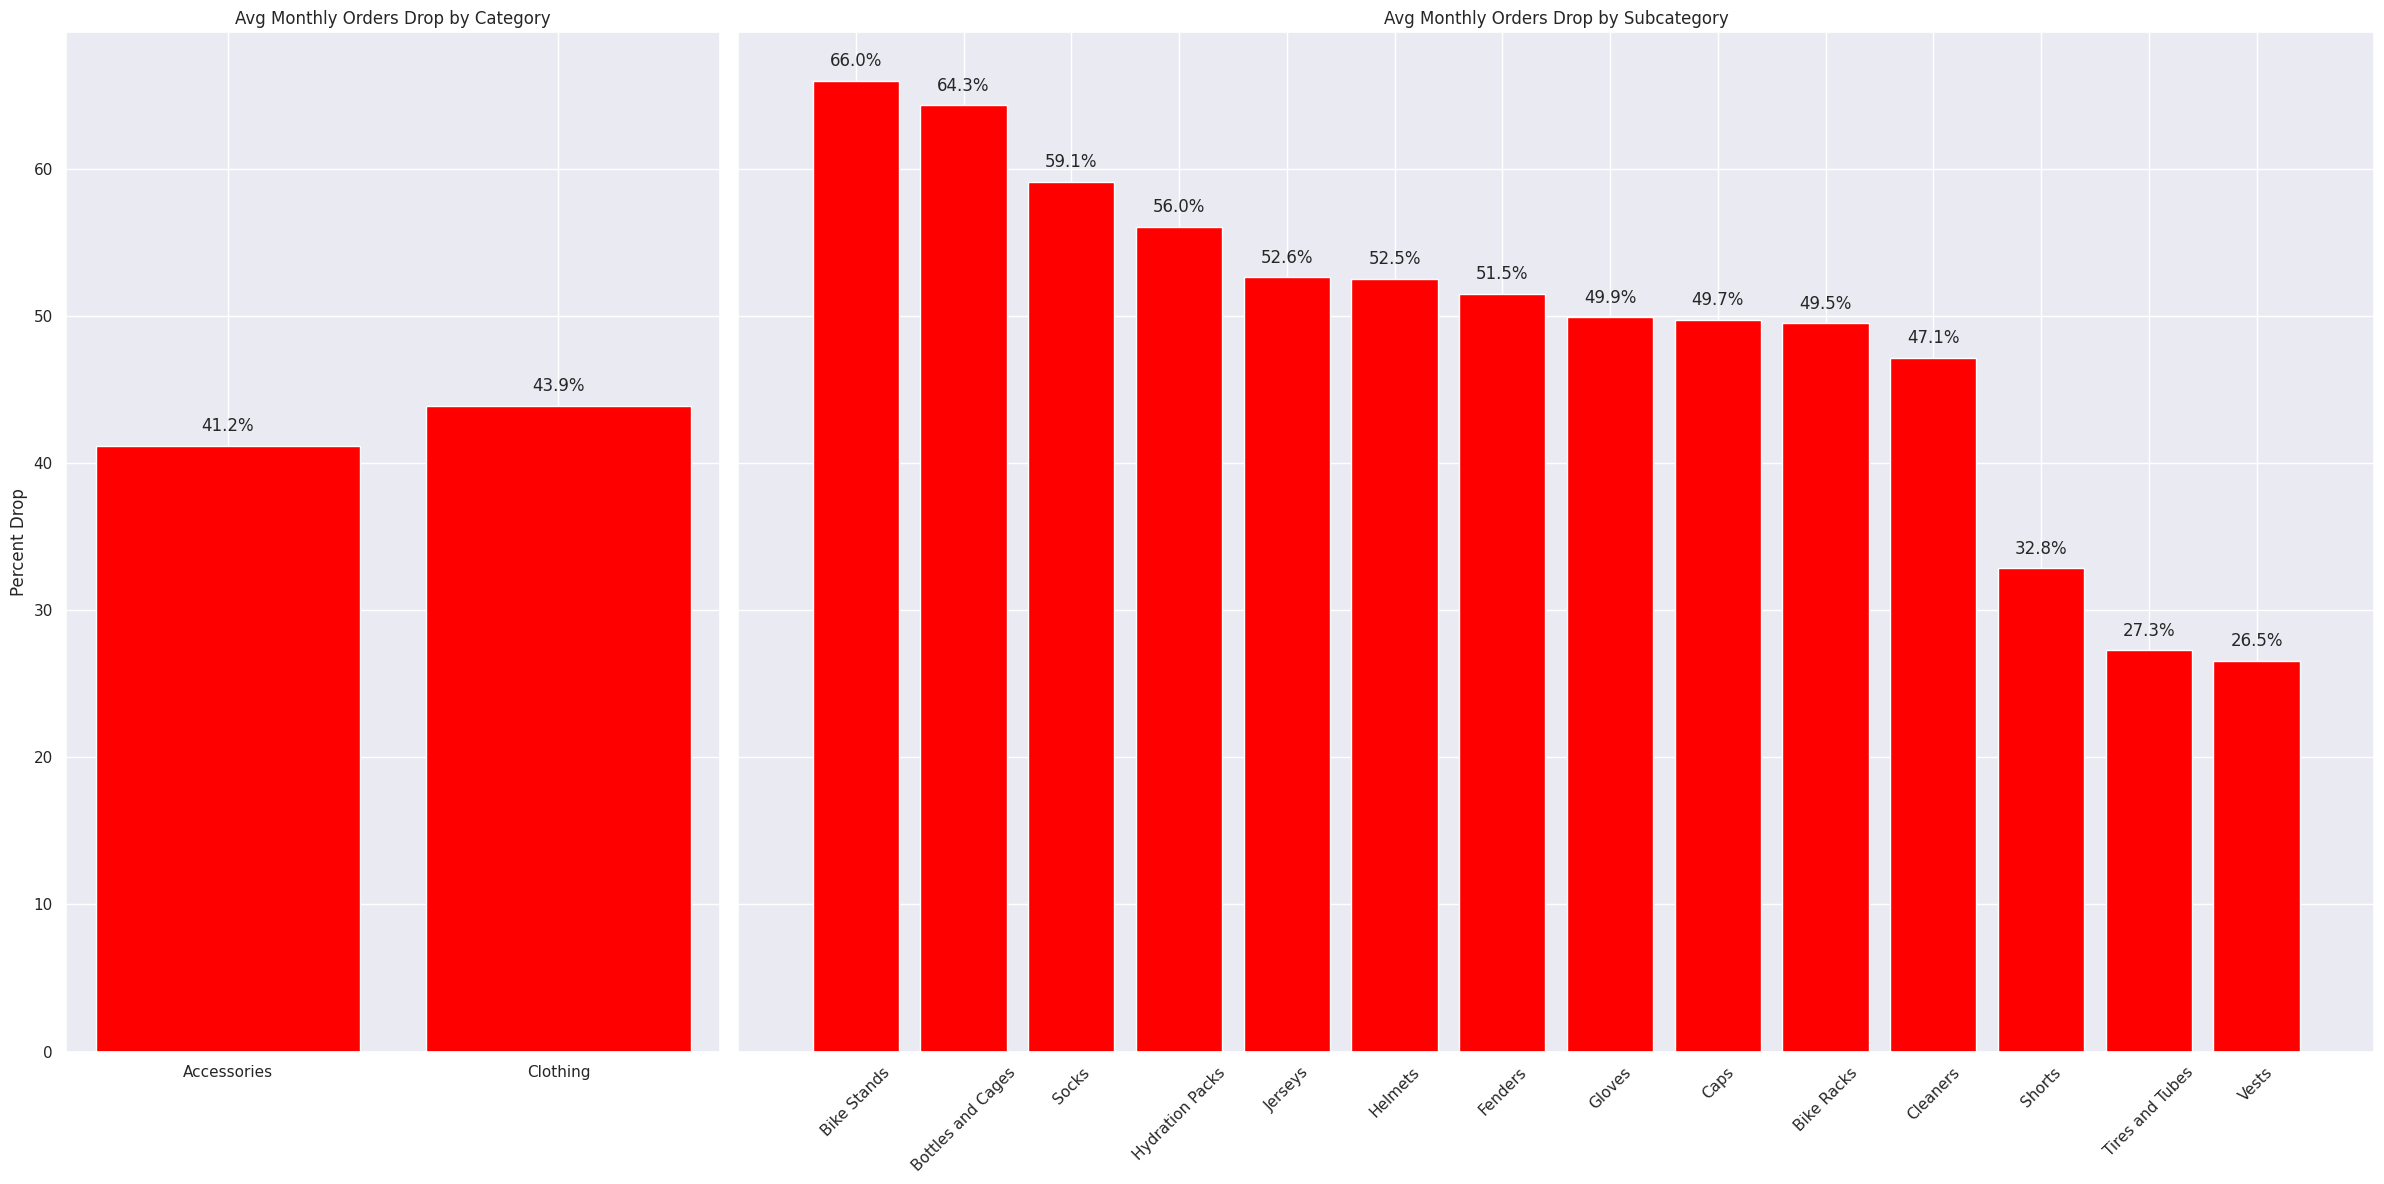

In [ ]:
pre  = df[df['Date'] < '2016-07-01']
post = df[df['Date'] >= '2016-07-01']

#Category-level drop (exclude Bikes)
cats = ['Accessories','Clothing']
pre_cat_avg  = pre[pre['Product Category'].isin(cats)] .groupby(['Month','Product Category']).size().groupby('Product Category').mean()
post_cat_avg = post[post['Product Category'].isin(cats)].groupby(['Month','Product Category']).size().groupby('Product Category').mean()
drop_cat = ((pre_cat_avg - post_cat_avg) / pre_cat_avg * 100).reindex(cats)

#Subcategory-level drop (exclude Bikes category)
sub = df[df['Product Category'] != 'Bikes']
pre_sub_avg  = pre[pre['Product Category'] != 'Bikes'] .groupby(['Month','Sub Category']).size().groupby('Sub Category').mean()
post_sub_avg = post[post['Product Category'] != 'Bikes'].groupby(['Month','Sub Category']).size().groupby('Sub Category').mean()
drop_sub = ((pre_sub_avg - post_sub_avg) / pre_sub_avg * 100).sort_values(ascending=False)

#Plot
fig, (ax1, ax2) = plt.subplots(
    1, 2,
    figsize=(24, 12),
    sharey=True,
    gridspec_kw={'width_ratios': [2, 5]}
)

#Categories
ax1.bar(drop_cat.index, drop_cat.values, color='red')
for i, v in enumerate(drop_cat.values):
    ax1.text(i, v + 1, f"{v:.1f}%", ha='center')
ax1.set_title('Avg Monthly Orders Drop by Category')
ax1.set_ylabel('Percent Drop')

#Subcategories
ax2.bar(drop_sub.index, drop_sub.values, color='red')
for i, v in enumerate(drop_sub.values):
    ax2.text(i, v + 1, f"{v:.1f}%", ha='center')
ax2.set_title('Avg Monthly Orders Drop by Subcategory')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Market basket analysis | apriori algorithm

We filter our dataframe to get data only in the period from January to June 2016 because I wanted to analyze the time when all product categories were present (this info I obtained from the line plot). I don’t need a lot of data since we don’t have timestamps, only dates. That’s why it’s impossible to precisely identify customer ID. To make something like a customer ID, I used ['Date', 'Customer Age', 'Customer Gender', 'Country', 'State'], but there might be some collisions, since sometimes we have quite high sales count in one state and one day, so it’s easy to have the same gender and age—which will skew our analysis. To account for that at least a bit, I computed collision_keys. We don’t want to see more than one row for a customer for one subcategory, because it looks suspicious. And that’s how we ended up with 3,802 customer baskets.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df[(df['Date'] >= '2016-01-01') & (df['Date'] <= '2016-06-30')].copy()

#Build cust_key
key_fields = ['Date', 'Customer Age', 'Customer Gender', 'Country', 'State']
df_filtered['cust_key'] = df_filtered[key_fields].astype(str).agg('_'.join, axis=1)

#Identify and remove ambiguous baskets (multi‑row, one subcategory)
grouped = df_filtered.groupby('cust_key').agg(
    rows=('Sub Category', 'size'),
    cats=('Sub Category', 'nunique')
)
collision_keys = grouped[(grouped['rows'] > 1) & (grouped['cats'] == 1)].index

#Remove those from the dataset
df_clean = df_filtered[~df_filtered['cust_key'].isin(collision_keys)].copy()

#Build customer baskets (cleaned)
cust_baskets = (
    df_clean
    .groupby('cust_key')
    .agg({
        'Product Category': lambda cats: list(cats.unique()),
        'Sub Category'    : lambda subs: list(subs.unique())
    })
    .reset_index()
)


multi_cat = cust_baskets[cust_baskets['Product Category'].map(len) > 1]

len(multi_cat)

3802

In [ ]:
daily_counts = (
    df_filtered
    .groupby(['State', 'Date'])
    .size()
    .reset_index(name='Sales_Count')
)

#Select top 10 state day pairs by number of sales
top10 = daily_counts.sort_values('Sales_Count', ascending=False).head(10)

top10

,State,Date,Sales_Count
275,California,2016-06-07,58
153,California,2016-02-05,56
213,California,2016-04-06,54
245,California,2016-05-08,53
241,California,2016-05-04,52
239,California,2016-05-02,51
274,California,2016-06-06,50
368,England,2016-03-01,50
246,California,2016-05-09,49
289,California,2016-06-21,49


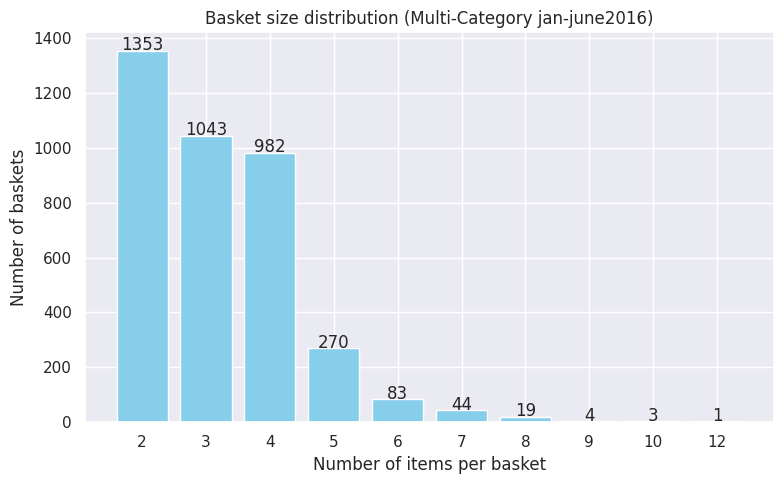

In [ ]:
#basket sizes number of line‐items for each clean session
basket_sizes = df_clean.groupby('cust_key').size()

#only those sessions in multi_cat
multi_keys = multi_cat['cust_key']
multi_sizes = basket_sizes.loc[multi_keys]

#Count how many baskets have size 2, size 3, size 4..
size_counts = multi_sizes.value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(size_counts.index.astype(str), size_counts.values, color='skyblue')
plt.title('Basket size distribution (Multi‐Category jan-june2016)')
plt.xlabel('Number of items per basket')
plt.ylabel('Number of baskets')
plt.xticks(rotation=0)

#Annotate
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 2, f"{int(h)}", ha='center')

plt.tight_layout()
plt.show()

On our cleaned piece of data we check if people usually buy something else like clothing and accessories when buying a bike.

At the category level obteined numbers actually tell us that buying a bike makes customers less likely to add an accessory or a piece of clothing than the shopper who is not bying a bike:

76.8 % of bike‑buying sessions include at least one accessory.

87.2 % of non‑bike sessions also include an accessory.

36.7 % of bike‑buying sessions include clothing.

40.0 % of non‑bike sessions include clothing.

If bikes were the 'anchor' driving those category purchases, we’d see P(Product|Bike) > P(Product|No Bike). Instead, bike‑buyers are below the baseline for both Accessories and Clothing.

this means that :

Accessories and Clothing get bought often on their own (nearly 9 out of 10 baskets have an accessory, 4 out of 10 have clothing).

Accessory sales are largely independent
A lot of accessories (tubes, bottles, lights) are routine, repeat purchases or impulse buys—non‑bike buyers still grab them at very high rates. True 'bike‑attachment' items live at the subcategory level (helmets, fenders, etc) that we have to explore.

In [ ]:
#Percentage of baskets that contain a bike
pct_bike = basket['Bikes'].mean() * 100   # mean(True/False) = proportion

print(f"Percentage of baskets that include a bike: {pct_bike:.1f}%")

Percentage of baskets that include a bike: 51.4%


A lift that only ranges from 1.01 to 1.10 is a pretty weak result, buying a bike only makes you 1–10 % more likely to pick up those accessories. We should explore this effect separately for each bike subcategory.

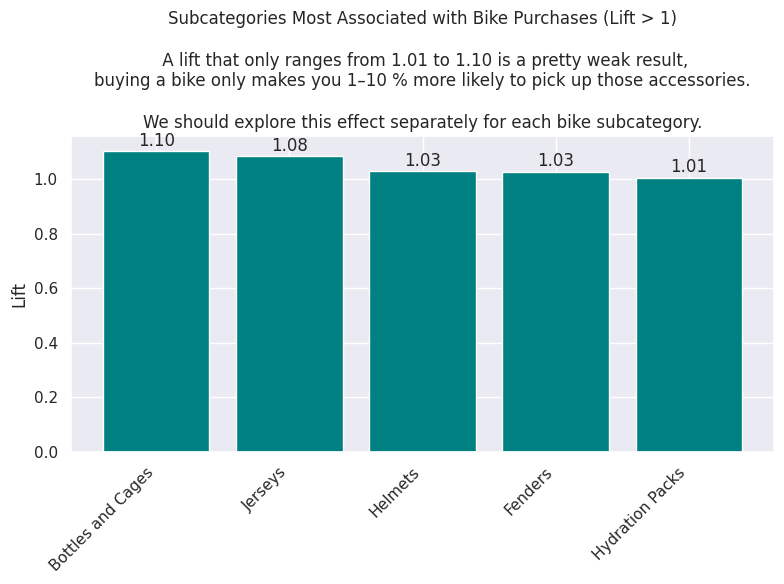

In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date']).dt.date
key_fields = ['Date','Customer Age','Customer Gender','Country','State']
df_clean['cust_key'] = df_clean[key_fields].astype(str).agg('_'.join, axis=1)

#One‑hot encode sub‑category baskets
basket = (
    df_clean
    .pivot_table(index='cust_key',
                 columns='Sub Category',
                 values='Quantity',
                 aggfunc='sum',
                 fill_value=0)
    .gt(0)
)

#Flag which sessions include a bike purchase
bike_flag = (
    df_clean
    .groupby('cust_key')['Product Category']
    .apply(lambda cats: 'Bikes' in cats.values)
)
basket['Bike'] = bike_flag

#Exclude subcategories that are themselves bikes
# First map each subcategory to its product category
subcat_to_cat = (
    df_clean[['Sub Category','Product Category']]
    .drop_duplicates()
    .set_index('Sub Category')['Product Category']
)
subcats = [s for s in basket.columns if s != 'Bike' and subcat_to_cat[s] != 'Bikes']

#Compute support and conditional support
support = basket[subcats].mean()
support_if_bike = basket.loc[basket['Bike'], subcats].mean()

#Compute lift and select those >1
lift = support_if_bike.div(support)
bike_adj = lift[lift > 1].sort_values(ascending=False)

#Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(bike_adj.index, bike_adj.values, color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Lift')
plt.title('Subcategories Most Associated with Bike Purchases (Lift > 1)\n\n A lift that only ranges from 1.01 to 1.10 is a pretty weak result,\nbuying a bike only makes you 1–10 % more likely to pick up those accessories.\n\nWe should explore this effect separately for each bike subcategory.')

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.02, f"{h:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
#bike subcategories
bike_subcats = ['Road Bikes','Mountain Bikes','Touring Bikes']

#Compute overall support for every non‐bike subcategory
all_subcats   = [c for c in basket.columns]
other_subcats = [c for c in all_subcats if c not in bike_subcats]

support = basket[other_subcats].mean()

#For each bike type, compute conditional support & lift
cross_vs_bike = {}
for bike in bike_subcats:
    # only look at baskets that include this bike
    has_bike = basket[bike]
    supp_if   = basket.loc[has_bike, other_subcats].mean()
    lift      = supp_if / support
    df_bike   = pd.DataFrame({
        'Support': support,
        f'Support|{bike}': supp_if,
        f'Lift|{bike}': lift
    })
    cross_vs_bike[bike] = df_bike

#Display top 5 cross‐sells for each bike type
for bike, df_bike in cross_vs_bike.items():
    print(f"\nTop cross‑sell subcategories for {bike}:")
    display(df_bike.sort_values(f'Lift|{bike}', ascending=False).head(5).round(3))


Top cross‑sell subcategories for Road Bikes:


,Support,Support|Road Bikes,Lift|Road Bikes
Sub Category,,,
Bike,0.514,1.000,1.947
Jerseys,0.161,0.215,1.333
Gloves,0.069,0.084,1.204
Helmets,0.346,0.373,1.079
Bottles and Cages,0.254,0.248,0.975



Top cross‑sell subcategories for Mountain Bikes:


,Support,Support|Mountain Bikes,Lift|Mountain Bikes
Sub Category,,,
Fenders,0.109,0.265,2.419
Bike,0.514,1.000,1.947
Hydration Packs,0.033,0.053,1.627
Bike Racks,0.015,0.023,1.541
Bottles and Cages,0.254,0.309,1.215



Top cross‑sell subcategories for Touring Bikes:


,Support,Support|Touring Bikes,Lift|Touring Bikes
Sub Category,,,
Bike,0.514,1.000,1.947
Socks,0.031,0.045,1.470
Caps,0.129,0.179,1.388
Helmets,0.346,0.426,1.234
Bottles and Cages,0.254,0.294,1.156


Support tells us 'How common is this combination'

Definition: The fraction of all baskets (orders) in which both items appear together.

Confidence tells us
'Given that someone bought X, how often do they also buy Y?'

Definition: Among all the orders that include the antecedent (X), the share that also include the consequent (Y).

Lift tells us
'How much better is this rule than random chance'

Definition:

Lift
=
Confidence
(
𝑋
 ⁣
→
 ⁣
𝑌
)
Support
(
𝑌
)
Lift=
Support(Y)
Confidence(X→Y)
​

The ratio of the observed joint frequency to the frequency you’d expect if X and Y were independent.

Interpretation:

A lift of 1 means no real association: buying X doesn’t change the odds of buying Y.

A lift > 1 means a positive association: X makes Y more likely.

A lift < 1 means a negative association: X actually makes Y less likely.

Mountain Bikes – the strongest cross-sell signals.
People who buy mountain bikes often also pick up Fenders, over 26 % of mountain bike buyers include them in their basket, compared to just 11 % of all customers. That’s a lift of 2.42, meaning fenders are more than twice as likely to be purchased when a mountain bike is involved.

Other items with above-average likelihood include Hydration Packs (Lift 1.63) and Bike Racks (1.54). Even Bottles and Cages (1.22) and Vests (1.11) are a little more common here.

Road Bikes.
With road bikes, we see a different pattern. Jerseys are added to 21.5 % of road bike baskets vs just 16.1 % overall, giving a solid lift of 1.33. Gloves (1.20) and Helmets (1.08) also show up a bit more often than usual.

Interestingly, Bottles and Cages, while very common overall, don’t increase with road bike purchases - they appear slightly less often (Lift < 1).

Touring Bikes – subtle but consistent patterns.
They buy socks (Lift 1.47) and Caps (1.39) show a noticeable uptick. Helmets (1.23) and Bottles and Cages (1.16) are also more common in these baskets, and even Bike Stands (1.05) edge slightly higher.

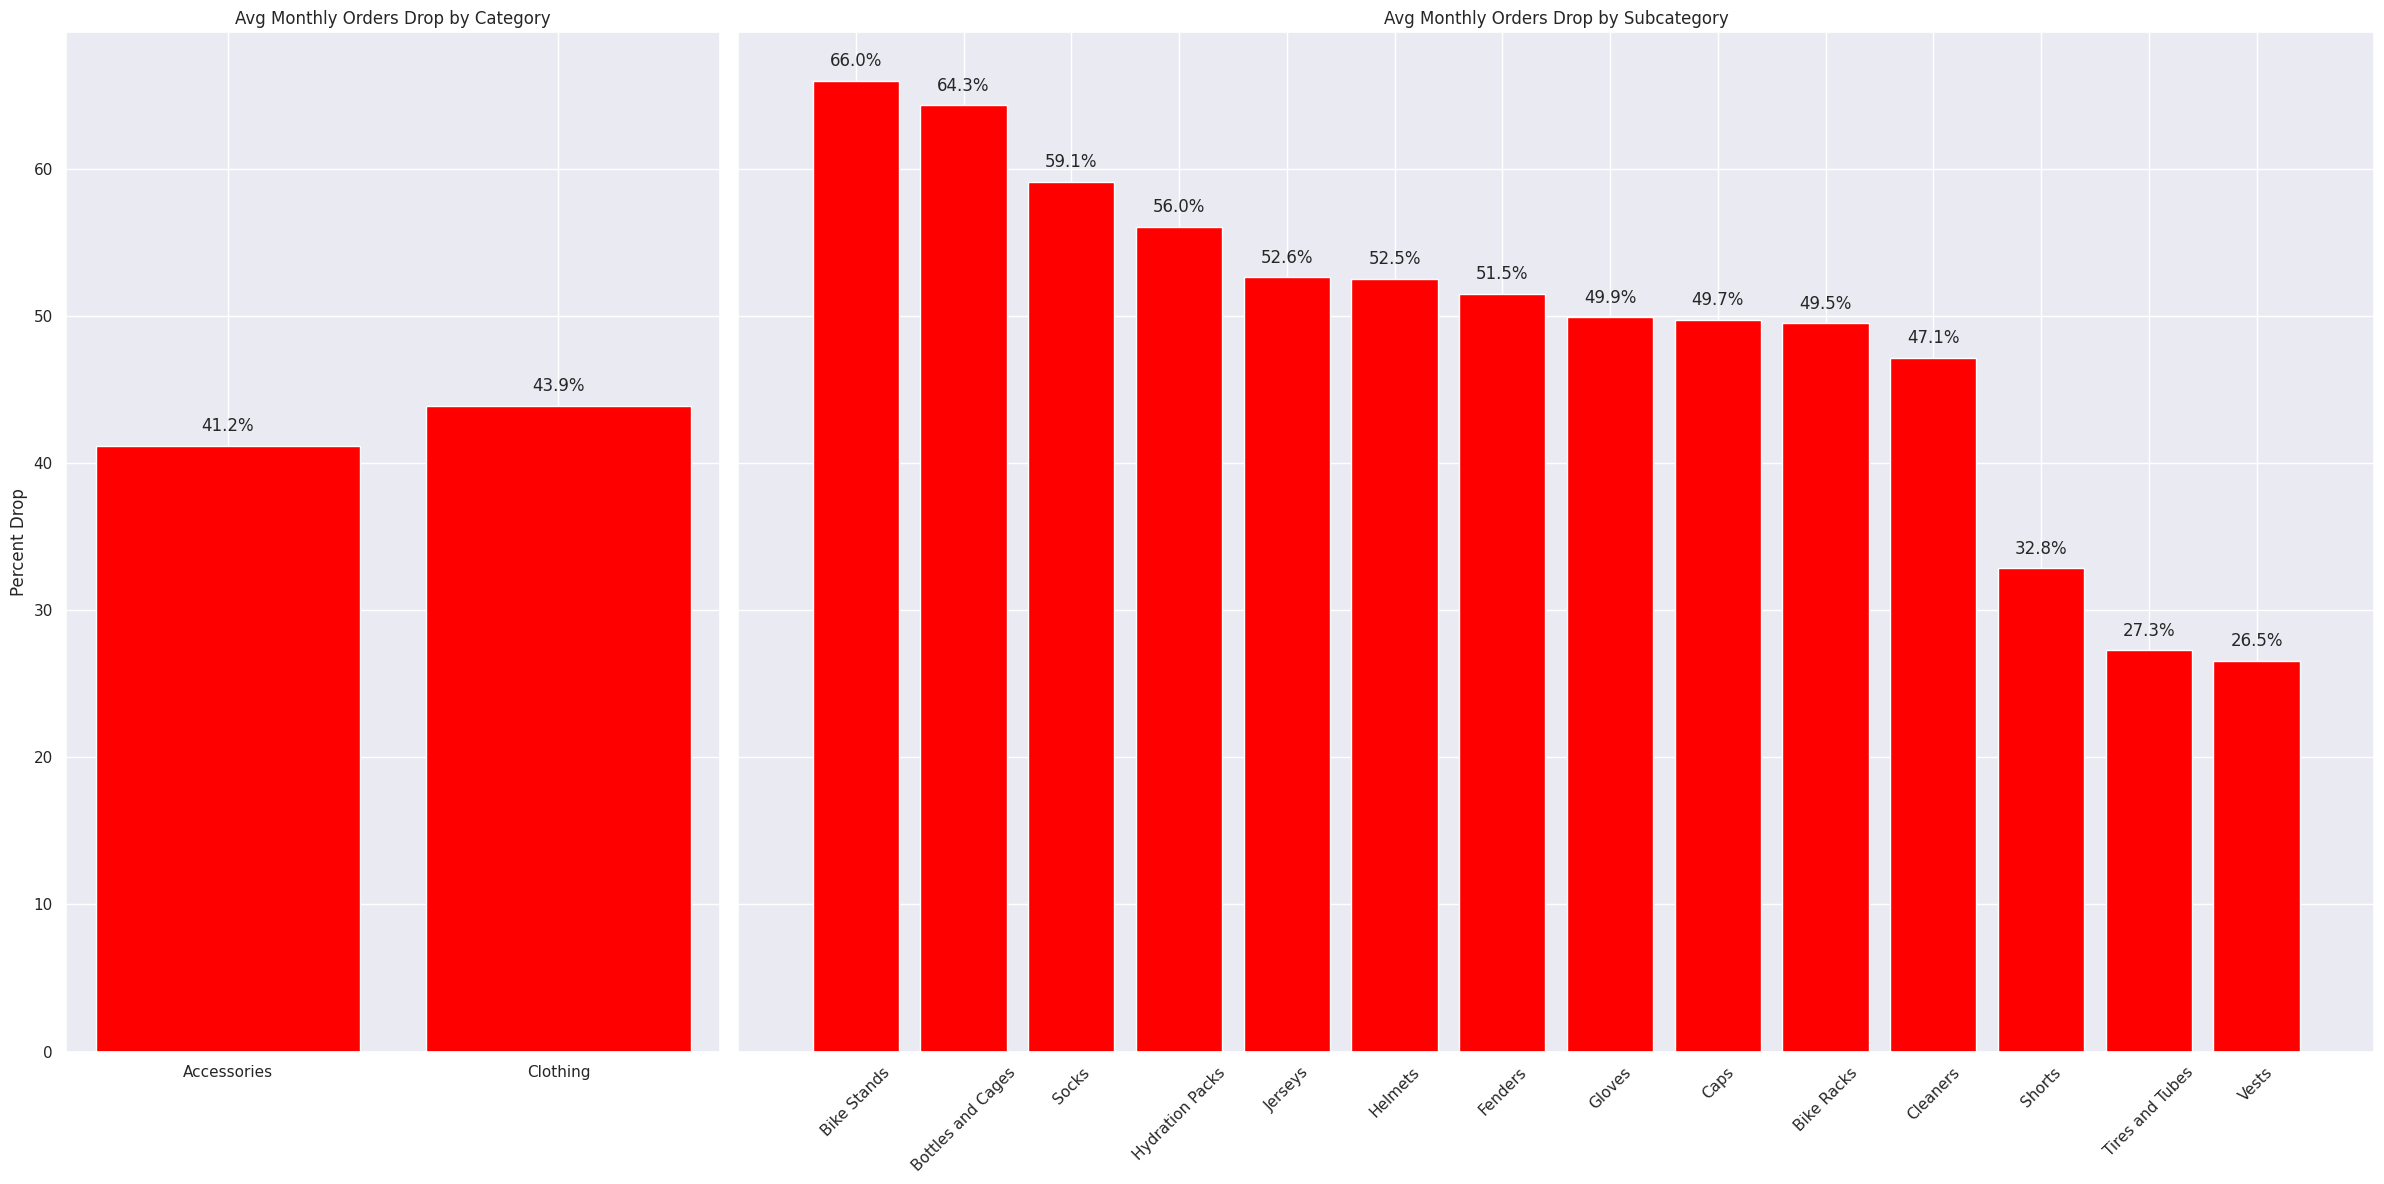

Going back to my hypothesis about the sales drop being related to the discontinuation of bicycle sales, the barplot shown earlier in this notebook (added here for convenience). We can clearly see that the drop in sales overlaps with subcategories that are strongly associated with bike purchases (since the barplot includes all 14 non-bike subcategories, and they are sorted by the size of the drop, we should not focus on their presence alone, but on their position in the ranking).

we don’t observe a perfectly linear pattern where bike-related items dropped the most and others stayed stable. For example, Jerseys (–52.5 %) and Helmets (–51.5 %), which are common among bike buyers, show moderate declines, while more general items like Cleaners (–47.1 %), Caps (–49.7 %), or even Gloves (–49.9 %) aren’t far behind. This suggests that, although bicycle removal likely played a central role in the sales drop, it wasn’t the only factor. Some non-bike-related items also saw notable declines, which points to additional causes we can’t fully identify from the available data.

In short, the data supports the idea that bikes were a key sales driver, but not the only one influencing the decline.

# **Bonus**

Quick market basket analysis for all products

In [ ]:
#frequent itemsets (min support = 2%)
frequent_itemsets = apriori(basket.iloc[:, :-1], min_support=0.02, use_colnames=True) #take full basket df but without last column 'bikes'

#Derive association rules (min lift = 1.2)
rules = association_rules(frequent_itemsets,
                          metric="lift",
                          min_threshold=1.2)

#Show the top rules sorted by lift
rules = rules.sort_values('lift', ascending=False)\
             .loc[:, ['antecedents','consequents','support','confidence','lift']]

rules.head(30)

,antecedents,consequents,support,confidence,lift
13,(Fenders),(Mountain Bikes),0.056044,0.512195,2.418594
12,(Mountain Bikes),(Fenders),0.056044,0.264640,2.418594
20,(Mountain Bikes),"(Bottles and Cages, Helmets)",0.025746,0.121572,1.610001
19,"(Bottles and Cages, Helmets)",(Mountain Bikes),0.025746,0.340956,1.610001
21,(Bottles and Cages),"(Mountain Bikes, Helmets)",0.025746,0.101172,1.527172
18,"(Mountain Bikes, Helmets)",(Bottles and Cages),0.025746,0.388626,1.527172
9,(Touring Bikes),(Caps),0.021036,0.179144,1.388260
8,(Caps),(Touring Bikes),0.021036,0.163017,1.388260
16,(Jerseys),(Road Bikes),0.041601,0.258033,1.333066
17,(Road Bikes),(Jerseys),0.041601,0.214923,1.333066


# **Marketing Implications**
Bundle Offers
“Mountain starter pack”: Offer a pre‑built bundle of a mountain bike, jersey, and fenders at a slight discount.

“Accessory Combo”: Promote bottle cages + fenders at checkout.

Cross‑sell suggestions for website:

On the Jersey page, display “Customers often add Fenders” with a quick‑add button.

On the Fender product page, show “Great with Mountain Bikes + Jerseys” and link.

Email Campaigns

Send a follow‑up email to buyers of hydration packs promoting bottle cages.

Target customers who have bought helmets + tires & tubes with a “Complete Your Ride” promo.